# 베이스라인 코드 실험

In [ ]:
# %pip install pycocotools

Note: you may need to restart the kernel to use updated packages.


#### YOLO 베이스라인

In [ ]:
# import os
# import json
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from ultralytics import YOLO
# import shutil
# from tqdm import tqdm
# import re

# # 경로 설정
# source_base_dir = r"C:\Users\daboi\Desktop\ai05-level1-project"
# output_base_dir = r"C:\Users\daboi\Desktop\ai05-level1-project\Exp\codeitteam7baseline"

# # 폴더 생성
# os.makedirs(output_base_dir, exist_ok=True)

# # 저장된 데이터 로드
# with open(os.path.join(source_base_dir, "train_master_annotations.json"), 'r', encoding = 'utf-8') as f:
#     master_data = json.load(f)

# with open(os.path.join(source_base_dir, "class_to_id.json"), 'r', encoding = 'utf-8') as f:
#     class_to_id = json.load(f)

# print(f"전체 데이터: {len(master_data)}개 이미지")
# print(f"클래스 수: {len(class_to_id)}개")

# # YOLO 데이터셋 생성
# def create_simple_yolo_dataset():
#     yolo_dir = os.path.join(output_base_dir, "yolo_dataset")
    
#     # 폴더 생성
#     for split in ['train', 'val']:
#         os.makedirs(os.path.join(yolo_dir, split, 'images'), exist_ok = True)
#         os.makedirs(os.path.join(yolo_dir, split, 'labels'), exist_ok = True)
    
#     # 모든 파일 리스트
#     all_files = list(master_data.keys())
    
#     # 간단한 분할 (80:20)
#     train_files, val_files = train_test_split(all_files, test_size = 0.2, random_state = 42)
    
#     print(f"데이터 분할: Train {len(train_files)}개, Val {len(val_files)}개")
    
#     # YOLO 형식 변환 함수
#     def convert_to_yolo_format(bbox, img_width, img_height):
#         x, y, w, h = bbox
#         x_center = (x + w / 2) / img_width
#         y_center = (y + h / 2) / img_height
#         width = w / img_width
#         height = h / img_height
#         return x_center, y_center, width, height
    
#     # 데이터셋 생성 함수
#     def create_split_dataset(file_list, split_name):
#         for filename in tqdm(file_list, desc = f"{split_name} 생성"):
#             img_data = master_data[filename]
            
#             # 이미지 복사
#             src_img = os.path.join(source_base_dir, "train_images", filename)
#             dst_img = os.path.join(yolo_dir, split_name, 'images', filename)
#             shutil.copy(src_img, dst_img)
            
#             # 라벨 파일 생성
#             label_file = filename.replace('.png', '.txt')
#             label_path = os.path.join(yolo_dir, split_name, 'labels', label_file)
            
#             with open(label_path, 'w', encoding = 'utf-8') as f:
#                 for ann in img_data['annotations']:
#                     class_id = ann['class_id']
#                     bbox = ann['bbox']
                    
#                     x_center, y_center, width, height = convert_to_yolo_format(
#                         bbox, img_data['width'], img_data['height']
#                     )
                    
#                     f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
    
#     # 데이터셋 생성
#     create_split_dataset(train_files, 'train')
#     create_split_dataset(val_files, 'val')
    
#     # data.yaml 생성
#     yaml_content = f"""# YOLO Dataset
# path: {yolo_dir}
# train: train/images
# val: val/images

# nc: {len(class_to_id)}
# names: {list(class_to_id.keys())}
# """
    
#     yaml_path = os.path.join(yolo_dir, "data.yaml")
#     with open(yaml_path, 'w', encoding = 'utf-8') as f:
#         f.write(yaml_content)
    
#     print(f"YOLO 데이터셋 생성 완료: {yaml_path}")
#     return yaml_path

# # 데이터셋 생성
# yaml_path = create_simple_yolo_dataset()

# # YOLO 모델 학습
# print("\nYOLO 모델 학습 시작")

# model = YOLO('yolov8n.pt')

# results = model.train(
#     data = yaml_path,
#     epochs = 50,
#     imgsz = 640,
#     batch = 16,
#     device = 0,
#     patience = 5,
#     lr0 = 0.01,
#     weight_decay = 0.0005,
#     project = os.path.join(output_base_dir, "models"),
#     name = 'yolo_baseline',
#     exist_ok = True,
#     verbose = True
# )

# print("YOLO 모델 학습 완료")

# # 성능 평가
# print("\nYOLO 모델 성능 평가")

# # 검증 성능 확인
# model_path = os.path.join(output_base_dir, "models", "yolo_baseline", "weights", "best.pt")
# model = YOLO(model_path)

# # 검증 데이터셋으로 성능 측정
# metrics = model.val()
# yolo_map = metrics.box.map  # mAP50-95
# yolo_map50 = metrics.box.map50  # mAP50
# yolo_map75 = metrics.box.map75  # mAP75

# print(f"YOLO 성능 결과:")
# print(f"   - mAP50: {yolo_map50:.4f}")
# print(f"   - mAP75: {yolo_map75:.4f}")
# print(f"   - mAP50-95: {yolo_map:.4f}")

# print(f"\최종 점수 (mAP@0.75): {yolo_map75:.4f}")

전체 데이터: 1489개 이미지
클래스 수: 73개
데이터 분할: Train 1191개, Val 298개


val 생성: 100%|██████████| 298/298 [00:00<00:00, 623.84it/s]


YOLO 데이터셋 생성 완료: C:\Users\daboi\Desktop\ai05-level1-project\Exp\codeitteam7baseline\yolo_dataset\data.yaml

YOLO 모델 학습 시작
Ultralytics 8.3.220  Python-3.11.14 torch-2.10.0.dev20251019+cu128 CUDA:0 (NVIDIA GeForce RTX 5070, 12227MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\daboi\Desktop\ai05-level1-project\Exp\codeitteam7baseline\yolo_dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, mo

- 아무 처리도 안하고 기본적인 YOLO 모델로 돌렸는데도 성능이 꽤 높게 나온다
- 여러 전처리와 실험을 해서 점수를 저기서 더 올릴수는 있겠지만 어느정도 높게 올라가면 점수를 올리기 쉽지는 않을 것 같다

#### Faster R-CNN 베이스라인

In [ ]:
# import os
# import json
# import torch
# import torchvision
# from torch.utils.data import Dataset, DataLoader
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm
# from PIL import Image
# from torchvision import transforms as T

# # mAP 계산을 위한 라이브러리
# try:
#     from pycocotools.coco import COCO
#     from pycocotools.cocoeval import COCOeval
#     import tempfile
# except:
#     print("pycocotools가 설치되지 않음: pip install pycocotools")
#     exit()

# # 경로 설정
# base_dir = r"C:\Users\daboi\Desktop\ai05-level1-project"
# output_dir = r"C:\Users\daboi\Desktop\ai05-level1-project\Exp\codeitteam7baseline2"
# os.makedirs(output_dir, exist_ok=True)

# # 저장된 데이터 로드
# with open(os.path.join(base_dir, "train_master_annotations.json"), 'r', encoding = 'utf-8') as f:
#     master_data = json.load(f)

# with open(os.path.join(base_dir, "class_to_id.json"), 'r', encoding = 'utf-8') as f:
#     class_to_id = json.load(f)

# print(f"클래스 수: {len(class_to_id)}개")
# print(f"이미지 수: {len(master_data)}개")

# # Custom Dataset 클래스
# class PillDataset(Dataset):
#     def __init__(self, data_dict, image_dir, transforms = None):
#         self.data_dict = data_dict
#         self.image_files = list(data_dict.keys())
#         self.image_dir = image_dir
#         self.transforms = transforms
        
#     def __len__(self):
#         return len(self.image_files)
    
#     def __getitem__(self, idx):
#         image_file = self.image_files[idx]
#         image_path = os.path.join(self.image_dir, image_file)
        
#         image = Image.open(image_path).convert("RGB")
#         image = np.array(image)
        
#         img_data = self.data_dict[image_file]
#         boxes = []
#         labels = []
        
#         for ann in img_data['annotations']:
#             bbox = ann['bbox']
#             x1, y1, w, h = bbox
#             x2 = x1 + w
#             y2 = y1 + h
            
#             if w > 0 and h > 0 and x2 > x1 and y2 > y1:
#                 boxes.append([x1, y1, x2, y2])
#                 labels.append(ann['class_id'] + 1)
        
#         if len(boxes) == 0:
#             boxes = [[10, 10, 50, 50]]
#             labels = [0]
        
#         boxes = torch.as_tensor(boxes, dtype=torch.float32)
#         labels = torch.as_tensor(labels, dtype=torch.int64)
        
#         target = {
#             "boxes": boxes,
#             "labels": labels,
#             "image_id": torch.tensor([idx])
#         }
        
#         if self.transforms:
#             image = self.transforms(image)
#         else:
#             image = T.ToTensor()(image)
        
#         return image, target

# # 데이터 분할
# all_files = list(master_data.keys())
# train_files, val_files = train_test_split(all_files, test_size = 0.2, random_state = 42)

# train_data = {k: master_data[k] for k in train_files}
# val_data = {k: master_data[k] for k in val_files}

# print(f"학습 데이터: {len(train_data)}개")
# print(f"검증 데이터: {len(val_data)}개")

# # 데이터셋 생성
# train_dataset = PillDataset(train_data, os.path.join(base_dir, "train_images"), T.Compose([T.ToTensor()]))
# val_dataset = PillDataset(val_data, os.path.join(base_dir, "train_images"), T.Compose([T.ToTensor()]))

# def collate_fn(batch):
#     return tuple(zip(*batch))

# train_loader = DataLoader(train_dataset, batch_size = 4, shuffle = True, collate_fn = collate_fn)
# val_loader = DataLoader(val_dataset, batch_size = 4, shuffle = False, collate_fn = collate_fn)

# # Faster R-CNN 모델 생성
# def create_faster_rcnn_model(num_classes):
#     weights = torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
#     model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights = weights)
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)
#     return model

# num_classes = len(class_to_id) + 1
# model = create_faster_rcnn_model(num_classes)

# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# print(f"사용 장치: {device}")
# model.to(device)

# # 옵티마이저
# params = [p for p in model.parameters() if p.requires_grad]
# optimizer = torch.optim.SGD(params, lr = 0.005, momentum = 0.9, weight_decay = 0.0005)

# # mAP 계산을 위한 COCO 형식 변환
# def prepare_coco_validation_data(val_data, class_to_id):
#     coco_data = {
#         "info": {"description": "Pill Detection Dataset", "version": "1.0", "year": 2024},
#         "licenses": [{"id": 1, "name": "Unknown"}],
#         "images": [],
#         "annotations": [],
#         "categories": []
#     }
    
#     for class_name, class_id in class_to_id.items():
#         coco_data["categories"].append({
#             "id": class_id + 1,
#             "name": class_name,
#             "supercategory": "pill"
#         })
    
#     annotation_id = 1
#     for image_idx, (filename, img_data) in enumerate(val_data.items(), 1):
#         coco_data["images"].append({
#             "id": image_idx,
#             "file_name": filename,
#             "width": img_data['width'],
#             "height": img_data['height']
#         })
        
#         for ann in img_data['annotations']:
#             bbox = ann['bbox']
#             coco_data["annotations"].append({
#                 "id": annotation_id,
#                 "image_id": image_idx,
#                 "category_id": ann['class_id'] + 1,
#                 "bbox": [float(coord) for coord in bbox],
#                 "area": float(bbox[2] * bbox[3]),
#                 "iscrowd": 0
#             })
#             annotation_id += 1
    
#     return coco_data

# # COCO GT 파일 생성
# coco_val_data = prepare_coco_validation_data(val_data, class_to_id)
# coco_gt_path = os.path.join(output_dir, "coco_gt.json")
# with open(coco_gt_path, 'w') as f:
#     json.dump(coco_val_data, f)

# # mAP 계산 함수
# def calculate_map(model, val_loader, device, coco_gt_path):
#     model.eval()
#     predictions = []
    
#     with torch.no_grad():
#         for images, targets in tqdm(val_loader, desc = "mAP 계산"):
#             images = [image.to(device) for image in images]
#             batch_predictions = model(images)
            
#             for i, (target, pred) in enumerate(zip(targets, batch_predictions)):
#                 image_id = target['image_id'].item() + 1
                
#                 boxes = pred['boxes'].cpu().numpy()
#                 scores = pred['scores'].cpu().numpy()
#                 labels = pred['labels'].cpu().numpy()
                
#                 for j in range(len(boxes)):
#                     if scores[j] > 0.05:
#                         x1, y1, x2, y2 = boxes[j]
#                         w = x2 - x1
#                         h = y2 - y1
                        
#                         predictions.append({
#                             "image_id": int(image_id),
#                             "category_id": int(labels[j]),
#                             "bbox": [float(x1), float(y1), float(w), float(h)],
#                             "score": float(scores[j])
#                         })
    
#     if not predictions:
#         return 0.0, 0.0, 0.0
    
#     with tempfile.NamedTemporaryFile(mode = 'w', delete = False, suffix = '.json') as f:
#         json.dump(predictions, f)
#         pred_path = f.name
    
#     try:
#         coco_gt = COCO(coco_gt_path)
#         coco_dt = coco_gt.loadRes(pred_path)
#         coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
#         coco_eval.evaluate()
#         coco_eval.accumulate()
#         coco_eval.summarize()
        
#         map_50 = float(coco_eval.stats[1])
#         map_75 = float(coco_eval.stats[2])
#         map_50_95 = float(coco_eval.stats[0])
        
#         os.unlink(pred_path)
#         return map_50, map_75, map_50_95
        
#     except Exception as e:
#         print(f"COCO 평가 중 오류: {e}")
#         if os.path.exists(pred_path):
#             os.unlink(pred_path)
#         return 0.0, 0.0, 0.0

# # 학습 함수
# def train_model(model, train_loader, val_loader, optimizer, coco_gt_path, num_epochs=10):
#     best_map_75 = 0.0
    
#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch+1}/{num_epochs}')
        
#         # 학습
#         model.train()
#         epoch_loss = 0
        
#         for images, targets in tqdm(train_loader, desc = "학습 중"):
#             images = [image.to(device) for image in images]
#             targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
#             try:
#                 loss_dict = model(images, targets)
#                 losses = sum(loss for loss in loss_dict.values())
                
#                 optimizer.zero_grad()
#                 losses.backward()
#                 optimizer.step()
                
#                 epoch_loss += losses.item()
#             except Exception as e:
#                 continue
        
#         # mAP 계산
#         map_50, map_75, map_50_95 = calculate_map(model, val_loader, device, coco_gt_path)
        
#         print(f'Epoch {epoch+1} 결과:')
#         print(f'  mAP@0.50: {map_50:.4f}')
#         print(f'  mAP@0.75: {map_75:.4f}')
#         print(f'  mAP@[0.5:0.95]: {map_50_95:.4f}')
        
#         if map_75 > best_map_75:
#             best_map_75 = map_75
#             torch.save(model.state_dict(), os.path.join(output_dir, 'faster_rcnn_best.pth'))
#             print(f'새로운 best model (점수: {best_map_75:.4f})')
    
#     return best_map_75

# # 모델 학습
# print("Faster R-CNN 학습 시작")
# best_map_75 = train_model(model, train_loader, val_loader, optimizer, coco_gt_path, num_epochs=10)

# print(f"\n최종 Faster R-CNN 점수 (mAP@0.75): {best_map_75:.4f}")

클래스 수: 73개
이미지 수: 1489개
학습 데이터: 1191개
검증 데이터: 298개
사용 장치: cuda
Faster R-CNN 학습 시작
Epoch 1/10


mAP 계산: 100%|██████████| 75/75 [00:17<00:00,  4.41it/s]


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.41s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.66s).
Accumulating evaluation results...
DONE (t=0.21s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.225
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.301
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.268
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.371
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.376
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:17<00:00,  4.35it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.52s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.540
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.697
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.661
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.540
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.717
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.719
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.27s).
Accumulating evaluation results...
DONE (t=0.16s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.640
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.841
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.788
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.771
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.771
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:16<00:00,  4.51it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.18s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.657
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.870
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.802
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.657
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.770
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.770
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:30<00:00,  2.47it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.37s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.883
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.829
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:28<00:00,  2.67it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.739
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.859
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.739
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.846
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:30<00:00,  2.47it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.14s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.741
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.880
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.872
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.741
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.853
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.853
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:30<00:00,  2.44it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.777
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.893
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.882
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.882
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:32<00:00,  2.29it/s]


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.17s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.787
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.899
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.899
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.787
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.884
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.884
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

mAP 계산: 100%|██████████| 75/75 [00:30<00:00,  2.48it/s]


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.36s).
Accumulating evaluation results...
DONE (t=0.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.759
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.879
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.759
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.876
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.876
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

- YOLO보다 점수가 조금 더 높게 나온다
- 속도는 YOLO와 비교가 안되게 느리다

# 데이터 다운 및 초기 탐색 및 전처리

In [2]:
# 운영체제에 따라 폰트 경로 설정
import platform
import os
import json
import glob
from tqdm import tqdm  # 진행 상황 표시
from collections import defaultdict, Counter
import pandas as pd # 분석을 위해 pandas 사용
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2

if platform.system() == 'Windows':
    # Windows: Malgun Gothic 설정
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin': # Mac OS
    # Mac OS: Apple Gothic 설정
    rc('font', family = 'AppleGothic')
else:
    # Linux 또는 기타 OS: 널리 사용되는 Nanum Gothic을 가정하거나, 기본 폰트 사용
    try:
        font_name = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf').get_name()
        rc('font', family = font_name)
    except:
        rc('font', family = 'DejaVu Sans')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False 

## 파일 다운 및 개수 확인

In [5]:
base_dir = r"E:\pytorch_env\ai05-level1-project"

train_img_dir = os.path.join(base_dir, "train_images")
test_img_dir = os.path.join(base_dir, "test_images")
train_ann_dir = os.path.join(base_dir, "train_annotations")

# train_annotations 폴더 및 모든 하위 폴더에서 .json 파일 검색
json_files = glob.glob(os.path.join(train_ann_dir, "**", "*.json"), recursive = True)
print(f"총 {len(json_files)}개의 JSON 어노테이션 파일")

# train_images 폴더의 모든 이미지 파일 목록 수집
all_train_img_files = {f for f in os.listdir(train_img_dir) if not f.startswith('.')}
print(f"총 {len(all_train_img_files)}개의 학습 이미지 파일")
print(f"총 {len(os.listdir(test_img_dir))}개의 테스트 이미지 파일")

총 4526개의 JSON 어노테이션 파일
총 1489개의 학습 이미지 파일
총 843개의 테스트 이미지 파일


- 4526개의 어노테이션이 있다 학습 이미지 파일은 1489개이다 이미지 하나에 여러 알약이 있다는 뜻이겠다(이미지를 대략적으로 직접 봐도 대부분 3 - 4개씩 있었다)
- 테스트 이미지는 원래 어노테이션이 없다

In [6]:
# 샘플 JSON 구조 확인
folder = r"C:\Users\daboi\Desktop\ai05-level1-project\train_annotations\K-003483-022347-027777-036637_json\K-003483"

sample_json = r"C:\Users\daboi\Desktop\ai05-level1-project\train_annotations\K-003483-022347-027777-036637_json\K-003483\K-003483-022347-027777-036637_0_2_0_2_70_000_200.json"

# annotation 구조 확인
with open(json_files[0], 'r') as f:
    data = json.load(f)
print(data.keys())
data

dict_keys(['images', 'type', 'annotations', 'categories'])


{'images': [{'file_name': 'K-001900-010224-016551-031705_0_2_0_2_70_000_200.png',
   'width': 976,
   'height': 1280,
   'imgfile': 'K-001900-010224-016551-031705_0_2_0_2_70_000_200.png',
   'drug_N': 'K-001900',
   'drug_S': '정상알약',
   'back_color': '연회색 배경',
   'drug_dir': '앞면',
   'light_color': '주백색',
   'camera_la': 70,
   'camera_lo': 0,
   'size': 200,
   'dl_idx': '1899',
   'dl_mapping_code': 'K-001900',
   'dl_name': '보령부스파정 5mg',
   'dl_name_en': 'Buspar Tab. 5mg Boryung',
   'img_key': 'http://connectdi.com/design/img/drug/1Mxwka5v0lL.jpg',
   'dl_material': '부스피론염산염',
   'dl_material_en': 'Buspirone Hydrochloride',
   'dl_custom_shape': '정제, 저작정',
   'dl_company': '보령제약(주)',
   'dl_company_en': 'Boryung',
   'di_company_mf': '',
   'di_company_mf_en': '',
   'item_seq': 198700706,
   'di_item_permit_date': '19870323',
   'di_class_no': '[01170]정신신경용제',
   'di_etc_otc_code': '전문의약품',
   'di_edi_code': '641901280,A09302381',
   'chart': '이약은 양면볼록한 장방형의 흰색정제이다',
   'drug_shap

### JSON 데이터 구조 정리

```yaml
ddata (dict)
│
├── "images" (list)
│     └── [0] (dict)
│          ├── file_name: 이미지 파일명 (예: "K-001900-...png")
│          ├── width: 이미지 너비(px)
│          ├── height: 이미지 높이(px)
│          ├── imgfile: 이미지 파일명(중복 정보)
│          ├── drug_N: 약물 코드(예: "K-001900")
│          ├── drug_S: 약물 상태(예: "정상알약")
│          ├── back_color: 배경색(예: "연회색 배경")
│          ├── drug_dir: 앞/뒷면(예: "앞면")
│          ├── light_color: 조명 색(예: "주백색")
│          ├── camera_la: 카메라 경사 각도(예: 70)
│          ├── camera_lo: 카메라 방위 각도(예: 0)
│          ├── size: 촬영 사이즈/스케일(예: 200)
│          ├── dl_idx: 데이터셋 내부 약물 ID(문자열/숫자)
│          ├── dl_mapping_code: 약물 매핑 코드(예: "K-001900")
│          ├── dl_name: 약 이름(국문)
│          ├── dl_name_en: 약 이름(영문)
│          ├── img_key: 원본 이미지 URL
│          ├── dl_material: 성분명(국문)
│          ├── dl_material_en: 성분명(영문)
│          ├── dl_custom_shape: 세부 제형(예: "정제, 저작정")
│          ├── dl_company: 제조사(국문)
│          ├── dl_company_en: 제조사(영문)
│          ├── di_company_mf: 제조원(국문) (없으면 "")
│          ├── di_company_mf_en: 제조원(영문) (없으면 "")
│          ├── item_seq: 품목일련번호(숫자)
│          ├── di_item_permit_date: 허가일자(YYYYMMDD 문자열)
│          ├── di_class_no: 의약품 분류 번호(예: "[01170]정신신경용제")
│          ├── di_etc_otc_code: 전문/일반 구분(예: "전문의약품")
│          ├── di_edi_code: EDI 코드(여러 값이면 쉼표구분, 없을 수 있음)
│          ├── chart: 제형/외형 설명 문구
│          ├── drug_shape: 알약 모양(예: "장방형")
│          ├── thick: 두께(mm 등 단위 가정)
│          ├── leng_long: 장축 길이
│          ├── leng_short: 단축 길이
│          ├── print_front: 전면 인쇄 문자(없으면 "")
│          ├── print_back: 후면 인쇄 문자(없으면 "")
│          ├── color_class1: 주 색상(예: "하양")
│          ├── color_class2: 보조 색상(없으면 "")
│          ├── line_front: 전면 분할선 정보(없으면 "")
│          ├── line_back: 후면 분할선 정보(없으면 "")
│          ├── img_regist_ts: 이미지 등록일(YYYYMMDD 문자열)
│          ├── form_code_name: 제형 코드명(예: "나정")
│          ├── mark_code_front_anal: 전면 마크 코드(분석) (없으면 "")
│          ├── mark_code_back_anal: 후면 마크 코드(분석) (없으면 "")
│          ├── mark_code_front_img: 전면 마크 이미지 링크(없으면 "")
│          ├── mark_code_back_img: 후면 마크 이미지 링크(없으면 "")
│          ├── mark_code_front: 전면 마크 코드(없으면 "")
│          ├── mark_code_back: 후면 마크 코드(없으면 "")
│          ├── change_date: 데이터 갱신일(YYYYMMDD)
│          └── id: 이미지 고유 ID(숫자)
│
├── "type" (str)
│     └── 어노테이션 타입 (예: "instances")
│
├── "annotations" (list)
│     └── [0] (dict)
│          ├── area: 바운딩 박스 면적(px^2)
│          ├── iscrowd: 군집 플래그(0/1)
│          ├── bbox: [x, y, w, h] (좌상단 기준 COCO 형식)
│          ├── category_id: 카테고리 ID(= categories[].id)
│          ├── ignore: 무시 플래그(0/1)
│          ├── segmentation: 폴리곤 분할 정보(없으면 빈 리스트 [])
│          ├── id: 어노테이션 고유 ID
│          └── image_id: 매칭되는 이미지 ID(= images[].id)
│
└── "categories" (list)
      └── [0] (dict)
           ├── supercategory: 상위 카테고리(예: "pill")
           ├── id: 카테고리 ID
           └── name: 카테고리 이름(국문 약명)

```

JSON 파일은 COCO 데이터셋 형식이다

### 속성 확인

In [7]:
# 속성 확인
all_metadata_records = []
processing_errors = 0

# JSON 파일에서 추출할 메타데이터 속성 목록 (images 섹션의 모든 키를 동적으로 추출)
# 첫 번째 JSON 파일에서 모든 가능한 키를 추출하여 컬럼을 동적으로 생성
if json_files:
    with open(json_files[0], 'r', encoding='utf-8') as f:
        sample_data = json.load(f)
        if sample_data and 'images' in sample_data and sample_data['images']:
            # file_name, width, height 등 약 50여개의 모든 속성 키를 추출
            all_possible_keys = list(sample_data['images'][0].keys())
        else:
            all_possible_keys = []
else:
    all_possible_keys = []

# 이미지당 캡처/약물 메타데이터 수집
for json_path in tqdm(json_files, desc="Collecting all metadata"):
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)

        if not data.get('images'):
            processing_errors += 1
            continue

        img_info = data['images'][0]
        record = {}

        # 1. Image 및 Drug Metadata (약 50개 항목)
        for key in all_possible_keys:
            record[key] = img_info.get(key)

        # 2. Annotation Metadata (BBox 정보)
        # 한 JSON 파일에는 여러 개의 BBox가 있을 수 있으므로, 각 BBox마다 레코드를 생성
        if not data.get('annotations'):
            # 어노테이션이 없는 경우도 레코드에 포함 (필요하다면)
            record['bbox'] = None
            record['category_id'] = None
            all_metadata_records.append(record.copy())
            continue

        for ann in data['annotations']:
            # BBox 정보 추가 (리스트 [x, y, w, h]로 저장)
            record['bbox'] = ann['bbox']
            # BBox가 연결된 클래스 ID (dl_idx/dl_mapping_code와는 다름, categories 섹션의 id)
            record['annotation_category_id'] = ann['category_id']

            # 딕셔너리를 복사하여 리스트에 추가 (매 BBox마다 하나의 행)
            all_metadata_records.append(record.copy())

    except Exception as e:
        processing_errors += 1
        # print(f"Error processing {json_path}: {e}")
        continue

# DataFrame으로 변환
metadata_all_pills_df = pd.DataFrame(all_metadata_records)

print("\n" + "=" * 50)
print(f"총 {len(metadata_all_pills_df)}개의 알약/BBox 레코드 수집 완료")
print(f"처리 오류 발생 JSON 파일 수: {processing_errors}개")
print(f"전체 속성(컬럼) 개수: {len(metadata_all_pills_df.columns)}개")

# 데이터프레임의 첫 5행과 모든 컬럼을 출력
print("\n첫 5개 알약 레코드의 모든 메타데이터:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(metadata_all_pills_df.head().to_string())

# 사용 후 옵션 복원
pd.reset_option('display.max_columns')
pd.reset_option('display.width')


총 4526개의 알약/BBox 레코드 수집 완료
처리 오류 발생 JSON 파일 수: 0개
전체 속성(컬럼) 개수: 52개

첫 5개 알약 레코드의 모든 메타데이터:
                                              file_name  width  height                                               imgfile    drug_N drug_S back_color drug_dir light_color  camera_la  camera_lo  size dl_idx dl_mapping_code        dl_name                    dl_name_en                                                      img_key dl_material           dl_material_en dl_custom_shape dl_company dl_company_en di_company_mf di_company_mf_en   item_seq di_item_permit_date    di_class_no di_etc_otc_code          di_edi_code                  chart drug_shape  thick  leng_long  leng_short print_front print_back color_class1 color_class2 line_front line_back img_regist_ts form_code_name mark_code_front_anal mark_code_back_anal mark_code_front_img mark_code_back_img mark_code_front mark_code_back change_date    id                  bbox  annotation_category_id
0  K-001900-010224-016551-031705_0_2_0_2_70_00

### 파일 검증

In [5]:
# JSON에서 참조하는 이미지 파일명 수집
annotated_img_files = set()

for jf in json_files:
    try:
        with open(jf, 'r', encoding = 'utf-8') as f:
            data = json.load(f)
        if data.get("images"):
            img_filename = data["images"][0].get("file_name")
            if img_filename:
                annotated_img_files.add(img_filename)
    except Exception as e:
        print(f"Error reading {jf}: {e}")
        continue

# 이미지 폴더에는 있는데 JSON이 참조하지 않는 이미지
imgs_without_annotations = all_train_img_files - annotated_img_files
print(f"어노테이션이 없는 이미지 수: {len(imgs_without_annotations)} 개")

# JSON은 참조하고 있는데 이미지 폴더에 실물 파일이 없는 경우
annotations_without_imgs = annotated_img_files - all_train_img_files
print(f"이미지가 없는 어노테이션 수: {len(annotations_without_imgs)} 개")

어노테이션이 없는 이미지 수: 0 개
이미지가 없는 어노테이션 수: 0 개


파일 검증 부분은 특별하게 결점은 없는 것 같다

## 데이터 통합

In [8]:
# JSON 파일들을 읽어 하나의 데이터로 통합
master_data = defaultdict(lambda: {
    'image_path': '', 
    'width': 0, 
    'height': 0, 
    'annotations': []
})
class_to_id = {}
current_id = 0
processing_errors = 0

for json_path in json_files:

    with open(json_path, 'r', encoding = 'utf-8') as f:
        data = json.load(f)

    # 이미지 정보 추출
    img_info = data['images'][0]
    img_filename = img_info['file_name']

    # 이미지 경로/크기 저장(이미지 당 1회)
    if not master_data[img_filename]['image_path']:
        image_path = os.path.join(train_img_dir, img_filename)
        master_data[img_filename]['image_path'] = image_path
        master_data[img_filename]['width'] = img_info['width']
        master_data[img_filename]['height'] = img_info['height']

    # 클래스 이름 매핑 준비
    # 이 JSON 파일이 정의하는 카테고리(알약) 정보를 맵으로 만든다
    category_map = {cat['id']: cat['name'] for cat in data['categories']}

    # 어노테이션(BBox) 처리
    for ann in data['annotations']:
        bbox = ann['bbox'] # [x, y, w, h]
            
        # category_id를 사용해 실제 클래스 이름을 찾는다
        ann_cat_id = ann['category_id'] 
            
        if ann_cat_id not in category_map:
            processing_errors += 1
            continue # category_map에 없으면 이 알약(ann)은 건너뛰고 다음 알약으로

        class_name = category_map[ann_cat_id]

        # 클래스 ID 부여
        if class_name not in class_to_id:
            class_to_id[class_name] = current_id
            current_id += 1
                
        class_id = class_to_id[class_name]

        # 최종 어노테이션 추가
        master_data[img_filename]['annotations'].append({
            'class_id': class_id,
            'class_name': class_name, # 이름도 저장해두면 분석에 유용할 것 같다
            'bbox': bbox
        })

print(f"총 {len(master_data)}개의 이미지 데이터 처리")
print(f"총 {len(class_to_id)}개의 고유 클래스(알약 종류) 발견")

# 결과 저장
# 이게 진짜 학습 데이터이다 4526개의 JSON을 1489개의 이미지별 묶음으로 만들었다 이 안에 이미지의 모든 정답이 들어있다
with open(os.path.join(base_dir, "train_master_annotations.json"), "w", encoding = 'utf-8') as f:
    json.dump(master_data, f, ensure_ascii = False, indent = 4)

# 이건 이름(키)와 숫자(value)를 연결해주는 맵이다
with open(os.path.join(base_dir, "class_to_id.json"), "w", encoding = 'utf-8') as f:
    json.dump(class_to_id, f, ensure_ascii = False, indent = 4)
        
print("train_master_annotations.json 파일과 class_to_id.json 파일 저장")

총 1489개의 이미지 데이터 처리
총 73개의 고유 클래스(알약 종류) 발견
train_master_annotations.json 파일과 class_to_id.json 파일 저장


- 1489개의 이미지에 73개의 클래스가 있다
- 사용하기 쉽게 train_master_annotations.json과 class_to_id.json을 만들어 저장했다

### 실제 train_image 확인

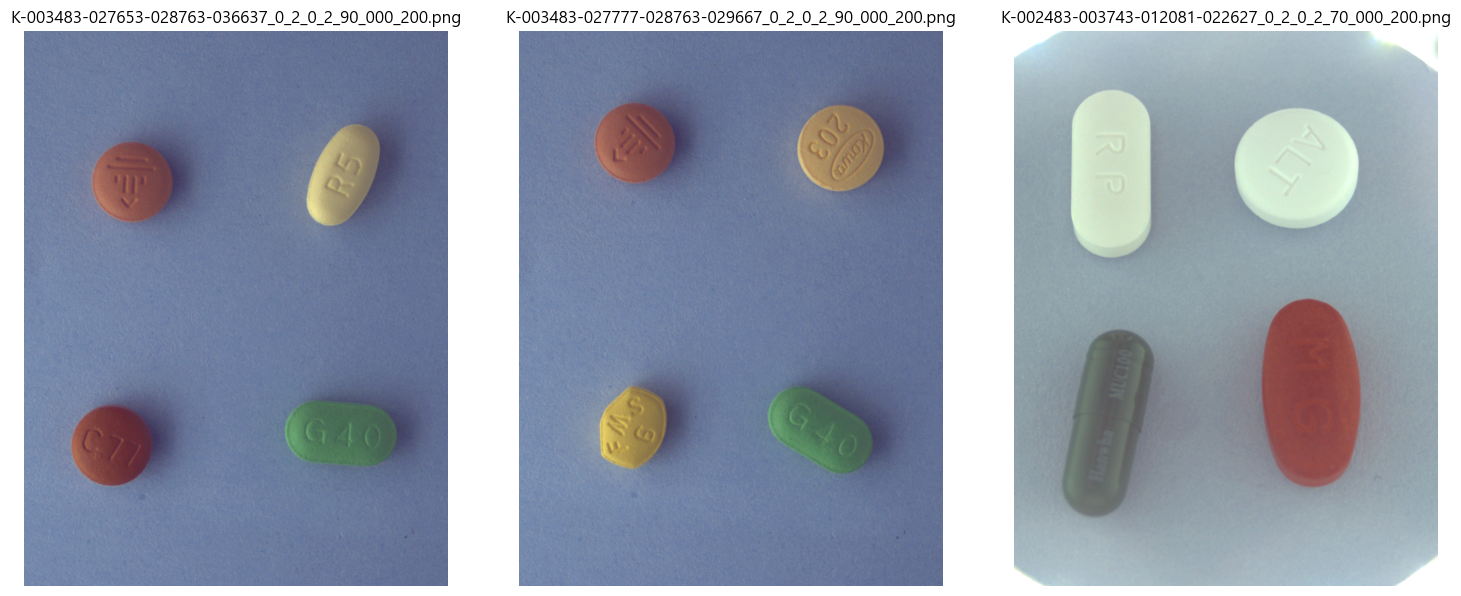

In [7]:
# 시각화할 이미지 파일 경로 목록 생성
# master_data의 키(파일 이름)들을 리스트로 가져온다
all_filenames = list(master_data.keys())

# 전체 파일 목록 중 3개를 랜덤으로 선택
if len(all_filenames) >= 3:
    sample_filenames = random.sample(all_filenames, 3)
else:
    # 파일이 3개 미만일 경우 전체 파일을 사용
    sample_filenames = all_filenames

# image_path를 재구성
sample_image_paths = [
    os.path.join(train_img_dir, filename) for filename in sample_filenames
]

# 이미지 로드 및 플로팅
plt.figure(figsize = (15, 6))
plot_index = 1

for i, img_path in enumerate(sample_image_paths):
    # OpenCV를 사용하여 이미지 로드
    img = cv2.imread(img_path)
    
    # 파일 로드 실패 검사 (안정성 확보)
    if img is None:
        print(f"파일 로드 실패 - '{img_path}'")
        continue

    # BGR -> RGB 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 서브플롯에 표시
    plt.subplot(1, 3, plot_index)
    plt.imshow(img_rgb)
    
    # 파일 이름에서 경로와 확장자 제거하여 제목으로 사용
    title = os.path.basename(img_path)
    plt.title(title, fontsize = 12)
    plt.axis('off')

    plot_index += 1

plt.tight_layout()
plt.savefig('random_sample_images.png')
plt.show()

약의 이미지를 실제로 시각화 해보았다

### 실제 BBox 확인

시각화 샘플 선정 완료: ['K-001900-016551-024850-033009_0_2_0_2_70_000_200.png', 'K-003544-010221-016551-031705_0_2_0_2_90_000_200.png']
'bbox_visualization_samples.png' 파일로 시각화 결과 저장


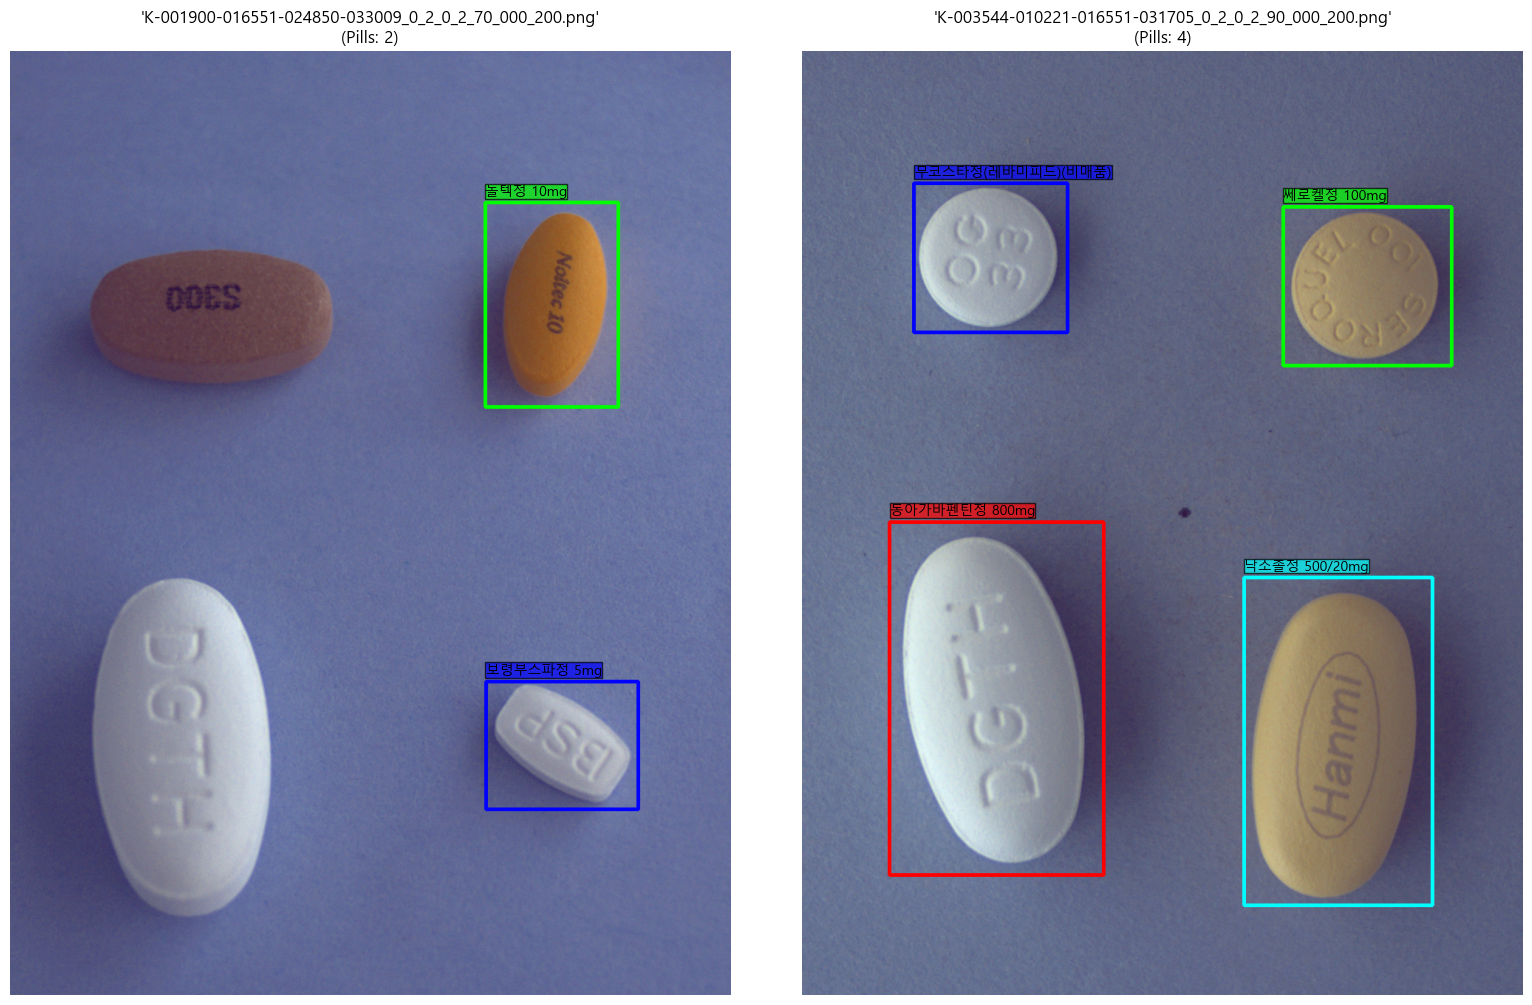

In [8]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# class_to_id의 key(이름)와 value(id)를 뒤집은 id_to_class 맵
id_to_class = {v: k for k, v in class_to_id.items()}

# 시각화할 샘플 이미지 선정
images_by_count = defaultdict(list)
for img_filename, data in master_data.items():
    pill_count = len(data['annotations'])
    if pill_count > 0:  # 어노테이션이 1개 이상 있는 이미지만
        images_by_count[pill_count].append(img_filename)

# 알약 2개짜리, 4개짜리 이미지 파일명을 랜덤으로 하나씩 선택
try:
    sample_2_pill = random.choice(images_by_count[2])
    sample_4_pill = random.choice(images_by_count[4])
    sample_filenames = [sample_2_pill, sample_4_pill]
    print(f"시각화 샘플 선정 완료: {sample_filenames}")
except Exception as e:
    print(f"샘플 선정 오류: {e}. (2개 또는 4개짜리 이미지가 없을 수 있음)")
    sample_filenames = random.sample(list(master_data.keys()), 2)  # 대안: 그냥 2개 랜덤

# BBox 시각화 및 저장
plt.figure(figsize=(16, 10))

# BBox 색상 (BGR)
COLORS = [
    (255, 0, 0),    # Blue
    (0, 255, 0),    # Green
    (0, 0, 255),    # Red
    (255, 255, 0)   # Yellow
]

for i, img_filename in enumerate(sample_filenames):
    img_path = os.path.join(train_img_dir, img_filename)

    # 이미지 로드 (BGR)
    image = cv2.imread(img_path)
    if image is None:
        print(f"오류: '{img_path}' 파일을 로드할 수 없음")
        continue

    annotations = master_data[img_filename]['annotations']

    # OpenCV에서 BGR로 박스 그리기
    for j, ann in enumerate(annotations):
        x, y, w, h = map(int, ann['bbox'])
        class_id = ann['class_id']
        class_name = id_to_class.get(class_id, "Unknown")

        color = COLORS[j % len(COLORS)]  # BGR
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness=3)

        # 텍스트는 matplotlib에서 RGB 색상으로 표시
        ann['class_name'] = class_name
        ann['color'] = (color[2]/255, color[1]/255, color[0]/255)  # RGB 변환

    # subplot에 표시
    plt.subplot(1, 2, i + 1)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(f"'{img_filename}'\n(Pills: {len(annotations)})", fontsize=12)
    plt.axis('off')

    # 텍스트 올리기
    for ann in annotations:
        x, y, w, h = map(int, ann['bbox'])
        plt.text(x, y - 10, ann['class_name'],
                 color='black',
                 fontsize=10,
                 bbox=dict(facecolor=ann['color'], alpha=0.7, pad=0.1))

plt.tight_layout()
output_filename = 'bbox_visualization_samples.png'
plt.savefig(output_filename)
print(f"'{output_filename}' 파일로 시각화 결과 저장")
plt.show()

BBox를 실제로 시각화를 해보았다

## 클래스 분석

### 클래스 분포 확인

총 4526개의 알약(= 바운딩 박스)
(전체 73개 클래스)
                  class_name  count
0         기넥신에프정(은행엽엑스)(수출용)    514
1                일양하이트린정 2mg    240
2                 보령부스파정 5mg    180
3                뮤테란캡슐 100mg    172
4                가바토파정 100mg    143
5              동아가바펜틴정 800mg    139
6               아토젯정 10/40mg    113
7                   리바로정 4mg    111
8                  리피토정 20mg    109
9               로수젯정10/5밀리그램    108
10                크레스토정 20mg    108
11         무코스타정(레바미피드)(비매품)     99
12                플라빅스정 75mg     97
13              트윈스타정 40/5mg     94
14         제미메트서방정 50/1000mg     88
15            자누메트정 50/850mg     88
16              트라젠타정(리나글립틴)     87
17                자누비아정 50mg     85
18     자누메트엑스알서방정 100/1000mg     85
19                 카나브정 60mg     84
20         트라젠타듀오정 2.5/850mg     81
21             엑스포지정 5/160mg     80
22              세비카정 10/40mg     79
23             아모잘탄정 5/100mg     76
24                 노바스크정 5mg     66
25           큐시드정 31.5mg/PTP 

C:\Users\daboi\AppData\Local\Temp\ipykernel_7156\889017649.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


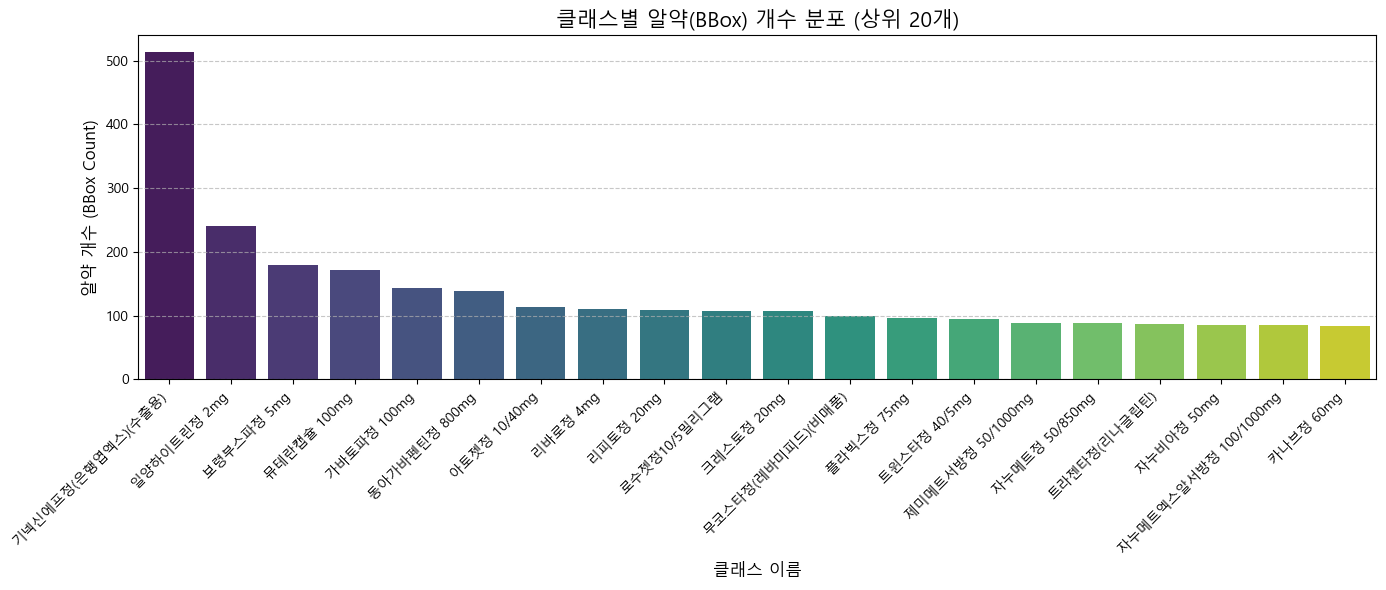

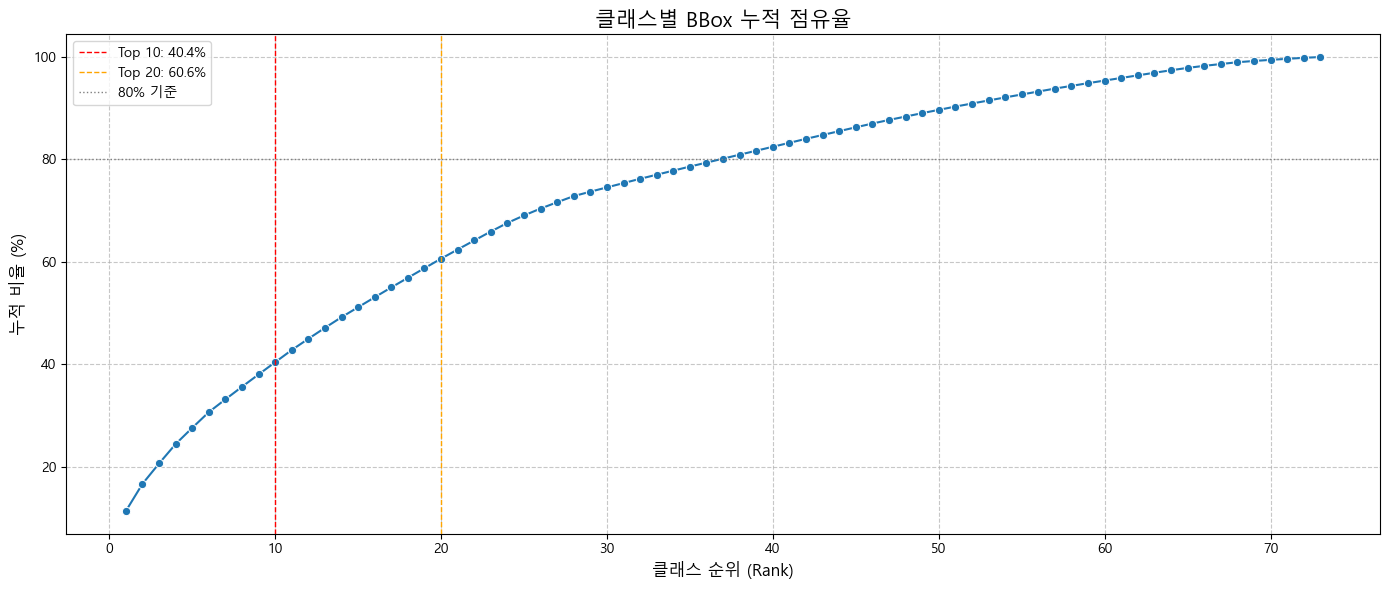

In [9]:
# 클래스 분포 분석 시작
# master_data에서 모든 클래스 이름(class_name)을 수집
all_class_names = []
for img_data in master_data.values():
    for ann in img_data['annotations']:
        all_class_names.append(ann['class_name'])

print(f"총 {len(all_class_names)}개의 알약(= 바운딩 박스)")

# 클래스별 개수 카운트
class_counts = Counter(all_class_names)

# DataFrame으로 변환 및 정렬
class_df = pd.DataFrame(class_counts.items(), columns = ['class_name', 'count'])
class_df = class_df.sort_values(by = 'count', ascending = False).reset_index(drop = True)


print(f"(전체 {len(class_df)}개 클래스)")

# 전체 DataFrame 출력
print(class_df.to_string())

# 클래스 시각화
# 클래스 분포 막대 그래프 (Bar Plot) - (Using 'count')
TOP_N = 20 # 상위 20개 클래스만 시각화

plt.figure(figsize = (14, 6))
sns.barplot(
    x = 'class_name', 
    y = 'count',  # 'count' 컬럼 사용
    data = class_df.head(TOP_N), 
    palette = 'viridis' 
)

plt.title(f'클래스별 알약(BBox) 개수 분포 (상위 {TOP_N}개)', fontsize = 15)
plt.xlabel('클래스 이름', fontsize = 12)
plt.ylabel('알약 개수 (BBox Count)', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.savefig('class_distribution_bar_plot_korean.png')
plt.show()


# 누적 분포 그래프 (Cumulative Distribution Plot) - (Using 'count')
# 전체 데이터 중 상위 클래스가 얼마나 많은 비중을 차지하는지 확인
total_bbox_count = class_df['count'].sum()
class_df['cumulative_count'] = class_df['count'].cumsum()
class_df['cumulative_ratio'] = class_df['cumulative_count'] / total_bbox_count * 100

plt.figure(figsize = (14, 6))
# 누적 비율을 선 그래프로 표시
sns.lineplot(
    x = class_df.index + 1, # 인덱스 + 1 = 순위
    y = 'cumulative_ratio',
    data = class_df,
    marker = 'o'
)

# 데이터 불균형의 심각도를 나타내는 주요 지점 표시
top_10_ratio = class_df.iloc[min(9, len(class_df) - 1)]['cumulative_ratio']
top_20_ratio = class_df.iloc[min(19, len(class_df) - 1)]['cumulative_ratio']

plt.axvline(x = 10, color = 'r', linestyle = '--', linewidth = 1, label = f'Top 10: {top_10_ratio:.1f}%')
plt.axvline(x = 20, color = 'orange', linestyle = '--', linewidth = 1, label = f'Top 20: {top_20_ratio:.1f}%')
plt.axhline(y = 80, color = 'gray', linestyle = ':', linewidth = 1, label = '80% 기준')

plt.title('클래스별 BBox 누적 점유율', fontsize = 15)
plt.xlabel('클래스 순위 (Rank)', fontsize = 12)
plt.ylabel('누적 비율 (%)', fontsize = 12)
plt.grid(linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.savefig('class_cumulative_distribution_plot_korean.png')
plt.show()

- 클래스 불균형이 심각한 것 같다
- 분할을 할 때 희귀한 알약들을 그나마 최대한 학습과 테스트에 나눠질 수 있도록 분할을 하는게 좋을 것 같다 stratified split (클래스 비율 유지)를 고려해본다
- 상위 10개 클래스만 해도 40%는 넘는다
- 데이터 증강은 당연하게 해야될 것 같다
- 클래스 가중치를 조절해주는 방법들을 고려해본다
    - 오버샘플링 (Oversampling)
    - 소수 클래스(예를 들면 50개 이하)는 강하게 증강
    - 클래스 그룹화(극도로 적은 클래스(예: 10개 미만)는 초반에는 묶어서 학습 후, 후반에 세분화)
    - WeightedRandomSampler
    - 손실 함수에서 소수 클래스에 더 큰 가중치를 부여
    - Focal Loss
    - 앙상블 기법 (Ensemble Methods)
    - Two-stage 학습
    - 이외에도 여러 기법을 고려해본다
    - 모델에 따라서 적용할 수 있는 방법이 달라질 수도 있을 것 같다

### 클래스별 고유값 확인

In [10]:
# 분석 대상 메타데이터 속성
TARGET_PROPERTIES = ['drug_shape', 'color_class1', 'print_front', 'print_back', 'dl_company_en']

# 클래스별 속성값 저장을 위한 딕셔너리
# Key: 클래스 이름 (dl_name), Value: {속성: [값1, 값2, ...]}
class_metadata_agg = defaultdict(lambda: {prop: [] for prop in TARGET_PROPERTIES})

for json_path in tqdm(json_files, desc = "Processing JSON metadata"):
    try:
        with open(json_path, 'r', encoding = 'utf-8') as f:
            data = json.load(f)
            
        if not data['images']:
            continue

        img_info = data['images'][0]
        
        # 클래스 이름 추출 (dl_name이 실제 알약 이름)
        class_name = img_info.get('dl_name')
        if not class_name:
            continue
            
        # 각 속성값 추출 및 저장
        for prop in TARGET_PROPERTIES:
            value = img_info.get(prop)
            if value is not None:
                class_metadata_agg[class_name][prop].append(value)
                
    except Exception as e:
        # print(f"Error processing {json_path}: {e}")
        continue

# 클래스별 메타데이터 고유값 카운트 분석
analysis_records = []

for class_name, props in class_metadata_agg.items():
    record = {'class_name': class_name}
    
    # 각 속성별 '고유한 값의 개수'를 계산
    for prop, values in props.items():
        # 고유값 개수 = len(set(values))
        record[f'unique_{prop}_count'] = len(set(values))
    
    # 해당 클래스가 전체 데이터셋에서 몇 번 등장했는지 (BBox가 아닌 JSON 파일 수 기준)
    record['json_count'] = len(props['drug_shape']) # 모든 JSON 파일은 drug_shape을 가질 것이므로 이를 기준으로 카운트
    analysis_records.append(record)

# DataFrame으로 변환
metadata_df = pd.DataFrame(analysis_records)

# 클래스 등장 횟수(json_count) 기준으로 내림차순 정렬
metadata_df = metadata_df.sort_values(by = 'json_count', ascending = False)

# 결과 출력 (상위 10개만 예시로 출력)
print("\n")
print("클래스별 메타데이터 고유값 개수 (상위 10개)")
print(metadata_df.head(10).to_string())

# 전체 클래스 메타데이터 분석 결과 CSV 저장 (전체 분석을 위해)
metadata_df.to_csv('class_metadata_uniqueness_analysis.csv', index = False, encoding = 'utf-8')
print("\n'class_metadata_uniqueness_analysis.csv' 파일 저장")

Processing JSON metadata: 100%|██████████| 4526/4526 [00:00<00:00, 13874.89it/s]



클래스별 메타데이터 고유값 개수 (상위 10개)
            class_name  unique_drug_shape_count  unique_color_class1_count  unique_print_front_count  unique_print_back_count  unique_dl_company_en_count  json_count
50  기넥신에프정(은행엽엑스)(수출용)                        1                          1                         1                        1                           1         514
29         일양하이트린정 2mg                        1                          1                         1                        1                           1         240
0           보령부스파정 5mg                        1                          1                         1                        1                           1         180
15         뮤테란캡슐 100mg                        1                          1                         1                        1                           1         172
1        동아가바펜틴정 800mg                        1                          1                         1                        1                

- class_name = 알약의 정식 명칭 (예: '스토가정 10mg')
- unique_drug_shape_count = 해당 알약이 데이터셋 내에서 가진 모양의 고유한 개수
- unique_color_class1_count	= 해당 알약의 주 색상의 고유한 개수
- unique_print_front_count = 알약 앞면에 인쇄된 문자/숫자의 고유한 개수
- unique_print_back_count = 알약 뒷면에 인쇄된 문자/숫자의 고유한 개수
- unique_dl_company_en_count = 알약을 제조한 회사 이름(영문)의 고유한 개수
- json_count = 해당 클래스를 포함하고 있는 JSON 어노테이션 파일의 총 개수(BBox 개수와 같다)

### 클래스별 색상 모양 확인

In [11]:
# 색상/모양 고정 클래스 비율 계산
print("데이터셋의 색상/모양 고정 클래스 비율")

total_classes = len(metadata_df)

# 모양(Shape)이 고정된 클래스 수
fixed_shape_count = len(metadata_df[metadata_df['unique_drug_shape_count'] == 1])
fixed_shape_ratio = fixed_shape_count / total_classes * 100

# 색상(Color)이 고정된 클래스 수
fixed_color_count = len(metadata_df[metadata_df['unique_color_class1_count'] == 1])
fixed_color_ratio = fixed_color_count / total_classes * 100

print(f"총 클래스 수: {total_classes}개")
print(f"- 모양(drug_shape)이 1개인 클래스: {fixed_shape_count}개 ({fixed_shape_ratio:.1f}%)")
print(f"- 색상(color_class1)이 1개인 클래스: {fixed_color_count}개 ({fixed_color_ratio:.1f}%)")

데이터셋의 색상/모양 고정 클래스 비율
총 클래스 수: 73개
- 모양(drug_shape)이 1개인 클래스: 72개 (98.6%)
- 색상(color_class1)이 1개인 클래스: 72개 (98.6%)


- 72개 클래스가 단 하나의 고유한 모양과 고유한 색상을 가진다
- 색상이나 모양만 보고 학습을 할 수 있을 것 같다
- 과적합이 우려된다 데이터 증강은 강하게 해줘야 될 것 같다
    - Color Jittering은 적극적으로 사용한다
    - 회전이나 원근 등 기하학적인 변환도 적극 사용한다(그림자 차이도 조금이라도 있을까 생각이 된다)
- 저 1개는 고유한 모양과 색상이 아닌 1개 이상의 모양과 색상을 가지는 것 같다 이상하니 한번 확인을 해본다

#### 클래스 이상치 확인

In [12]:
# 클래스 이상치 확인
variant_classes_df = metadata_df[
    (metadata_df['unique_drug_shape_count'] != 1) | 
    (metadata_df['unique_color_class1_count'] != 1)
]

print(f"이상 클래스: {len(variant_classes_df)}개")
print(variant_classes_df[['class_name', 'json_count', 'unique_drug_shape_count', 'unique_color_class1_count']].to_string())

이상 클래스: 1개
    class_name  json_count  unique_drug_shape_count  unique_color_class1_count
4  가바토파정 100mg           0                        0                          0


- 가비토정은 모양이나 색상 정보가 아예 없다
- 그런데 이 약은 143개나 있다
- 메타데이터라서 모델 학습은 가능하겠으나 이 정보를 활용하는 분석은 할 수 없을 것 같다

### 클래스별 인쇄 패턴 확인

In [13]:
# 데이터의 다양성 인쇄 내용이 2가지 이상인 클래스 필터링
print("2가지 이상 인쇄 패턴을 가진 클래스")

# 앞면 또는 뒷면 인쇄가 1보다 큰 클래스 필터링
diverse_print_df = metadata_df[
    (metadata_df['unique_print_front_count'] > 1) | 
    (metadata_df['unique_print_back_count'] > 1)
]

# 결과 출력
print(f"총 {len(diverse_print_df)}개의 클래스가 다양한 인쇄 패턴이 있음")
print(diverse_print_df[['class_name', 'json_count', 'unique_print_front_count', 'unique_print_back_count']].head(5).to_string())

2가지 이상 인쇄 패턴을 가진 클래스
총 0개의 클래스가 다양한 인쇄 패턴이 있음
Empty DataFrame
Columns: [class_name, json_count, unique_print_front_count, unique_print_back_count]
Index: []


- 73개의 클래스는 100% 똑같은 인쇄 내용을 가진다(예: 앞에는 100% LIP20 뒤에는 100% 화이자라 적혀있다)
- 모양과 색상이 아니라 약에 인쇄된 패턴을 봐도 패턴 자체를 외워버릴 가능성이 높을 것 같다
- 강력한 랜덤 회전과 블러 그리고 노이즈를 증강으로 적용해서 글자의 특징을 학습하는걸 고려해본다

#### 인쇄 오류 확인

In [14]:
# 인쇄 확인
# DataFrame으로 변환
metadata_all_pills_df = pd.DataFrame(all_metadata_records)
print(f"\n'metadata_all_pills_df' 생성 완료. (총 {len(metadata_all_pills_df)}개 레코드)")

# 메타데이터 논리 오류 탐색
# 데이터 준비
df = metadata_all_pills_df.copy()

# 'print_front', 'print_back', 'line_front', 'line_back'의 NaN을 빈 문자열('')로 대체
print_cols = ['print_front', 'print_back', 'line_front', 'line_back']
for col in print_cols:
    df[col] = df[col].fillna('')

# 논리 오류 조건 정의
# "앞면" 사진인데, '앞면 각인/줄'은 없고 '뒷면 각인/줄' 정보만 있음
cond1_dir = df['drug_dir'] == '앞면'
cond1_front_empty = (df['print_front'] == '') & (df['line_front'] == '')
cond1_back_filled = (df['print_back'] != '') | (df['line_back'] != '')

contradiction1 = df[cond1_dir & cond1_front_empty & cond1_back_filled]

# "뒷면" 사진인데, '뒷면 각인/줄'은 없고 '앞면 각인/줄' 정보만 있음
cond2_dir = df['drug_dir'] == '뒷면'
cond2_front_filled = (df['print_front'] != '') | (df['line_front'] != '')
cond2_back_empty = (df['print_back'] == '') & (df['line_back'] == '')

contradiction2 = df[cond2_dir & cond2_front_filled & cond2_back_empty]

# 결과 집계 및 출력
print("\n" + "="*70)
print("메타데이터 논리 오류 탐색 결과")
print("'앞면' 사진인데 '뒷면' 정보만 있는 경우: {:,} 건".format(len(contradiction1)))
print("'뒷면' 사진인데 '앞면' 정보만 있는 경우: {:,} 건".format(len(contradiction2)))

total_contradictions = len(contradiction1) + len(contradiction2)
print("-------------------------------------------------")
print(f"총 {total_contradictions:,} 건의 논리적 모순 데이터 발견")

if total_contradictions > 0:
    # .drop_duplicates()를 제거하여 리스트 타입 컬럼 문제 해결
    all_contradictions_df = pd.concat([contradiction1, contradiction2])
    
    print("\n" + "="*70)
    print("논리 오류가 가장 많이 발생한 클래스:")
    # 'dl_name' (클래스 이름) 기준으로 카운트
    print(all_contradictions_df['dl_name'].value_counts().to_string())
    
    print("\n" + "="*70)
    print("논리 오류가 발생한 이미지 파일:")
    # 'file_name' (이미지 파일) 기준으로 카운트
    print(all_contradictions_df['file_name'].value_counts().to_string())

else:
    print("\n논리적 모순 데이터 없음")


'metadata_all_pills_df' 생성 완료. (총 4526개 레코드)

메타데이터 논리 오류 탐색 결과
'앞면' 사진인데 '뒷면' 정보만 있는 경우: 21 건
'뒷면' 사진인데 '앞면' 정보만 있는 경우: 2 건
-------------------------------------------------
총 23 건의 논리적 모순 데이터 발견

논리 오류가 가장 많이 발생한 클래스:
dl_name
글리틴정(콜린알포세레이트)     21
콜리네이트연질캡슐 400mg     2

논리 오류가 발생한 이미지 파일:
file_name
K-003351-016232-033880_0_2_0_2_75_000_200.png    1
K-003351-016232-033880_0_2_0_2_90_000_200.png    1
K-003351-016262-033880_0_2_0_2_70_000_200.png    1
K-003351-016262-033880_0_2_0_2_75_000_200.png    1
K-003351-016262-033880_0_2_0_2_90_000_200.png    1
K-003351-020238-033880_0_2_0_2_75_000_200.png    1
K-003351-020238-033880_0_2_0_2_90_000_200.png    1
K-003351-021325-033880_0_2_0_2_70_000_200.png    1
K-003351-021325-033880_0_2_0_2_75_000_200.png    1
K-003351-021325-033880_0_2_0_2_90_000_200.png    1
K-003351-022074-033880_0_2_0_2_70_000_200.png    1
K-003351-022074-033880_0_2_0_2_75_000_200.png    1
K-003351-022074-033880_0_2_0_2_90_000_200.png    1
K-003351-029667-033880_0_2_0_2_70_

- 23개는 라벨링이 제대로 되지 않은 것 같다
- 부가정보인 메타 데이터라서 이미지를 보고 학습할 때는 문제가 되지 않을 것 같다

### 클래스별 이미지 안에서의 중복 확인

In [15]:
# 이미지 안에서 알약 중복 확인
has_duplicates = any(
    len([ann['class_name'] for ann in img_data['annotations']]) != 
    len(set(ann['class_name'] for ann in img_data['annotations']))
    for img_data in master_data.values()
)

print("한 이미지 내 동일 클래스 중복 존재:", "없음" if not has_duplicates else "있음")

한 이미지 내 동일 클래스 중복 존재: 없음


- 한 이미지 내에서 똑같은 클래스가 나오는 경우는 없다
- 실제 환경에서는 동일한 알약이 여러 개 동시에 놓이는 경우가 많을 것 같은데 YOLO의 Mosaic + Copy-Paste를 고려해본다

### 클래스별 이미지 안에서의 개수 분포 확인

이미지당 알약 개수 분포
   pill_count  image_count
0           1           64
1           2          302
2           3          634
3           4          489


C:\Users\daboi\AppData\Local\Temp\ipykernel_7156\1218247814.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


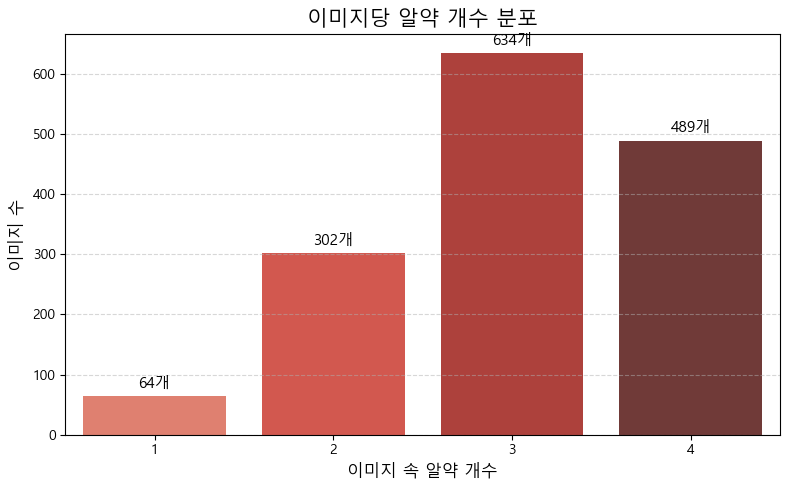

In [16]:
# 이미지당 알약 개수 분포 분석 시작
# master_data에서 이미지별 알약 개수(ann_count)를 뽑아 리스트로 만든다
ann_counts_list = []
for img_data in master_data.values():
    ann_counts_list.append(len(img_data['annotations']))

# 개수별로 카운트
count_distribution = Counter(ann_counts_list)

# DataFrame으로 변환
count_df = pd.DataFrame(count_distribution.items(), columns = ['pill_count', 'image_count'])
count_df = count_df.sort_values(by = 'pill_count', ascending = True).reset_index(drop = True)

print("이미지당 알약 개수 분포")
print(count_df.to_string())

# 데이터프레임 생성
# master_data에서 이미지별 알약 개수(ann_count)를 뽑아 리스트로 만든다
ann_counts_list = []
for img_data in master_data.values():
    ann_counts_list.append(len(img_data['annotations']))

# 개수별로 카운트
count_distribution = Counter(ann_counts_list)

# DataFrame으로 변환
count_df = pd.DataFrame(count_distribution.items(), columns = ['pill_count', 'image_count'])
count_df = count_df.sort_values(by = 'pill_count', ascending = True).reset_index(drop = True)


# 시각화 (Bar Plot)
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='pill_count', 
    y='image_count', 
    data=count_df, 
    palette='Reds_d'
)

# 각 막대 위에 이미지 개수 텍스트 추가
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}개", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontsize = 11)

plt.title('이미지당 알약 개수 분포', fontsize = 15)
plt.xlabel('이미지 속 알약 개수', fontsize = 12)
plt.ylabel('이미지 수', fontsize = 12)
plt.xticks(fontsize = 10)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.savefig('pill_count_distribution_bar_plot_clean.png')
plt.show()

- 이미지당 최대 4개의 이미지가 있다
- 대부분 이미지당(약 75%) 3 - 4개의 알약이 있다
    - 객체들이 서로 근접해 있을 수도 있어서 NMS (Non-Maximum Suppression) 임계값이 중요할 수도 있다
    - 다양한 알약들이 있을테니 FPN을 사용해볼 수도 있겠다
- 눈으로 대충 봤을 때 1 - 2개짜리는 없었던 것 같다 더 자세히 확인을 해본다

#### 파일명 기준 이미지별 알약 개수 분포

In [6]:
# 'K-ID' 개수를 저장할 리스트
true_counts_list = []
# 'K-ID' 패턴이 아닌 파일명을 저장할 리스트
filenames_without_k_ids = []

# master_data의 1,489개 이미지 파일명을 모두 순회
for img_filename in master_data.keys():
    
    try:
        # 파일명에서 "True Count"를 파싱
        
        # '_'를 기준으로 앞부분만 추출
        # 예: 'K-001900-016548-018110-027926'
        base_name = img_filename.split('_')[0]
        
        # 'K-' ID 패턴인지 확인
        if not base_name.startswith('K-'):
            filenames_without_k_ids.append(img_filename)
            continue # K-ID 파일이 아니면 건너뜀

        # '-'를 기준으로 K-ID들을 분리
        # 예: ['K', '001900', '016548', '018110', '027926']
        k_parts = base_name.split('-')
        
        # 'K'를 제외한 ID 개수 (예: 5 - 1 = 4)
        true_count = len(k_parts) - 1
        
        true_counts_list.append(true_count)
        
    except Exception as e:
        # 혹시 모를 파싱 오류
        print(f"파싱 오류 발생: {img_filename}, 오류: {e}")

# "True Count"의 분포를 집계한다
if true_counts_list:
    # Counter를 사용해 개수별 빈도 계산
    count_distribution = Counter(true_counts_list)
    
    # DataFrame으로 변환
    count_df = pd.DataFrame(count_distribution.items(), 
                            columns=['알약 개수 (파일명 기준)', '이미지 수'])
    count_df = count_df.sort_values(by='알약 개수 (파일명 기준)').reset_index(drop=True)
    
    print("\n" + "="*50)
    print("파일명(True Count) 기준, 이미지별 알약 개수 분포")
    print("="*50)
    print(count_df.to_string(index=False))
else:
    print("\n[코드 검증 결과]")
    print("K-ID 패턴을 가진 이미지 파일을 찾을 수 없습니다.")

if filenames_without_k_ids:
    print("\n" + "="*50)
    print(f"참고: {len(filenames_without_k_ids)}개 파일은 K-ID 패턴이 아님")
    # 예시 5개만 출력
    print(filenames_without_k_ids[:5])


파일명(True Count) 기준, 이미지별 알약 개수 분포
 알약 개수 (파일명 기준)  이미지 수
              3    294
              4   1195


1489개의 이미지에서 이미지당 알약 개수가 무조건 3 - 4개인건 확실해 보인다

#### 클린셋 & 오류셋 확인

In [9]:
# 결과를 저장할 리스트
error_records = []
clean_files = []
missing_label_files = []

# master_data의 모든 이미지를 검사 (1489개)
for img_filename, data in master_data.items():
    
    # 1. 파일명에서 "True Count" 파싱
    # 'K-001900-016548-018110-027926_0_...png'
    
    # '_'를 기준으로 앞부분만 추출
    base_name = img_filename.split('_')[0] 
    # 'K-001900-016548-018110-027926'
    
    # '-'를 기준으로 K-ID들을 분리
    k_parts = base_name.split('-')
    # ['K', '001900', '016548', '018110', '027926']
    
    # 'K'를 제외한 ID 개수
    true_count = len(k_parts) - 1 
    
    # 2. 어노테이션에서 "Annotation Count" 파악
    annotation_count = len(data['annotations'])

    # 3. 두 개수 비교
    if true_count == annotation_count:
        # 두 개수가 일치 = 완벽한 데이터
        clean_files.append(img_filename)
        
    else:
        # 두 개수가 불일치 = 오류 데이터
        error_records.append({
            'filename': img_filename,
            'true_count': true_count,          # 파일명 기준 개수
            'annotation_count': annotation_count # JSON 기준 개수
        })
        
        if annotation_count < true_count:
            # 발견한 "레이블 누락" (예: 파일명 4개, 어노테이션 1개)
            missing_label_files.append(img_filename)
        # else:
            # (만약 있다면) 어노테이션이 더 많은 경우

# 결과 분석
print(f"총 {len(master_data)}개 이미지 검사 완료\n")
print("="*50)
print(f"[클린셋] 개수 일치: {len(clean_files)}개")
print(f"[오류셋] 개수 불일치: {len(error_records)}개")
print("="*50)

if error_records:
    # 오류 상세 내용 (상위 20개)
    error_df = pd.DataFrame(error_records)
    print("\n[오류 상세 내역 (개수 불일치 Top 20)]")
    print(error_df.head(20).to_string())
    
    # 오류 유형별 집계
    print("\n[오류 유형별 집계]")
    print(error_df.groupby(['true_count', 'annotation_count']).size())

총 1489개 이미지 검사 완료

[클린셋] 개수 일치: 639개
[오류셋] 개수 불일치: 850개

[오류 상세 내역 (개수 불일치 Top 20)]
                                                filename  true_count  annotation_count
0   K-001900-010224-016551-031705_0_2_0_2_70_000_200.png           4                 3
1   K-001900-010224-016551-031705_0_2_0_2_75_000_200.png           4                 2
2   K-001900-010224-016551-031705_0_2_0_2_90_000_200.png           4                 3
3   K-001900-010224-016551-033009_0_2_0_2_70_000_200.png           4                 2
4   K-001900-010224-016551-033009_0_2_0_2_75_000_200.png           4                 2
5   K-001900-010224-016551-033009_0_2_0_2_90_000_200.png           4                 3
6   K-001900-016548-018110-021026_0_2_0_2_90_000_200.png           4                 2
7   K-001900-016548-018110-027926_0_2_0_2_70_000_200.png           4                 3
8   K-001900-016548-018110-027926_0_2_0_2_90_000_200.png           4                 3
9   K-001900-016548-018110-029345_0_2_0_2_75_0

- 원래도 데이터가 많은 느낌은 아니었는데 거의 절반을 못쓰게 되었다
- 학습을 할 때 무조건 오류셋은 놔두고 학습을 한다

클린셋 639개 기반 의사 레이블링
- 1단계: "클린셋" 분리 및 "베이스라인" 모델 학습
    - 데이터 분리: 
        - 전체 1,489개 이미지를 2개 그룹으로 분리
        - "클린셋" (Clean Set): 639개 (파일명 개수 == 어노테이션 개수인 완벽한 데이터)
        - "오류셋" (Error Set): 850개 (파일명 개수 != 어노테이션 개수인 "레이블 누락" 데이터)
        - 검증셋 구성: "클린셋" (639개) 안에서만 9:1 등으로 훈련/검증 데이터 분리
        - 예: train_clean (약 575개) / val_clean (약 64개)
        - "베이스라인" 모델 학습: train_clean (575개) 데이터로만 베이스라인 모델을 학습시킴
        - (주의) 데이터가 639개뿐이므로 과적합 위험이 매우 높음. Copy-Paste, Mosaic 등 강력한 데이터 증강(Augmentation)이 필수.

- 2단계: "오류셋" 예측 및 레이블 필터링
    - 예측 (Inference): 
        - 1단계에서 학습시킨 "베이스라인 모델"을 "오류셋" 850장 이미지에 대해 실행시킴
        - 신뢰도 필터링 (Confidence Filtering):
            - 모델이 예측한 수많은 BBox 중, 사전에 설정한 신뢰도 점수 (예: score > 0.7)를 통과하는 예측만 선별함
            - 신뢰도가 낮은(예: score = 0.45) 예측은 "가짜 정답"으로 사용하지 않고 버림
            - 통과된 [bbox, class, score] 세트를 "의사 레이블" (Pseudo-Labels)이라 칭함

- 3단계: 데이터 병합 (중복 제거 및 추가)
    - 목표: "오류셋"(850개)의 기존 정답(1~3개)에, "의사 레이블" 중 새롭게 발견된 것만 추가함
    - 로직:
        - "오류셋" 이미지 1장(기존 정답 1~3개)과 "의사 레이블"(모델 예측 3~4개)을 가져옴
        - 모델 예측 3~4개를 기존 정답 1~3개와 하나씩 IoU (Intersection over Union) 비교
        - Case 1 (중복): 특정 "의사 레이블"이 "기존 정답" 중 하나와 IoU > 0.9로 높게 겹치면 → 중복이므로 버림
        - Case 2 (신규): 특정 "의사 레이블"이 모든 "기존 정답"과 IoU < 0.2 (거의 겹치지 않음) → 신규 레이블이므로 리스트에 추가
        - 결과: "오류셋" 850개의 어노테이션이 1~3개에서 3~4개로 수정/보강됨 (fixed_error_set)

- 4단계: "최종" 모델 재학습
    - 최종 데이터셋 구성:
        - train_clean (약 575개) + fixed_error_set (850개)
        - 최종 모델 학습:
            - 보강된 전체 학습 데이터(약 1,425개)를 사용하여 모델을 처음부터 다시 학습시킴
            - 이 최종 모델은 "베이스라인 모델"보다 훨씬 많은(수리된) 데이터를 학습했으므로 더 높은 성능을 기대할 수 있음

#### 이미지당 알약 개수 vs BBox 크기 재확인

C:\Users\daboi\AppData\Local\Temp\ipykernel_7156\414618382.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


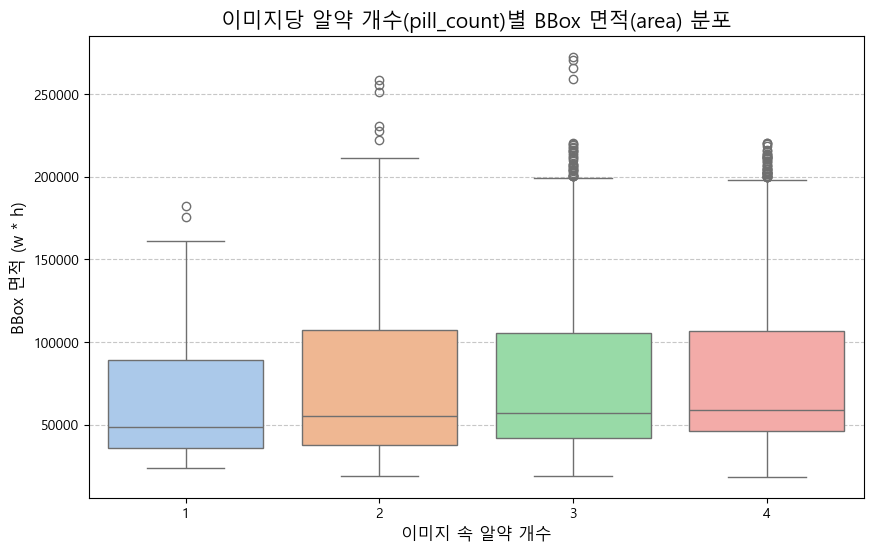

In [19]:
# master_data에서 모든 BBox 정보를 수집
all_bboxes_data = []
ann_counts_map = {}

for img_filename, img_data in master_data.items():
    
    # 이미지당 알약 개수 미리 계산
    pill_count = len(img_data['annotations'])
    ann_counts_map[img_filename] = pill_count
    
    for ann in img_data['annotations']:
        x, y, w, h = ann['bbox']
        
        # BBox 속성 계산 및 리스트에 추가
        all_bboxes_data.append({
            'filename': img_filename,
            'class_name': ann['class_name'],
            'w': w,
            'h': h,
            'area': w * h,
            'x_center': x + w / 2,
            'y_center': y + h / 2,
        })

# DataFrame으로 변환
bbox_df = pd.DataFrame(all_bboxes_data)
# 이미지당 알약 개수 (pill_count) 정보 추가
bbox_df['pill_count'] = bbox_df['filename'].map(ann_counts_map)

plt.figure(figsize = (10, 6))
sns.boxplot(
    x='pill_count', 
    y='area', 
    data=bbox_df,
    palette='pastel' 
)
plt.title('이미지당 알약 개수(pill_count)별 BBox 면적(area) 분포', fontsize = 15)
plt.xlabel('이미지 속 알약 개수', fontsize = 12)
plt.ylabel('BBox 면적 (w * h)', fontsize = 12)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.savefig('pill_count_vs_area_boxplot.png')

- 원래 직관대로라면 이미지에 알약이 4개나 있으면 BBox가 줄어들거라 생각되지만 2 3 4개일 때의 중앙값과 분포가 거의 동일하다
- 데이터셋이 매우 엄격하게 통제된 환경에서 촬영이 된 것 같다
- 2 3 4개일때 모두 완전히 동일한 조건에서 찍혔다고 봐도 되는데 아까 2개가 있는 이미지는 없다고 했었다 그런데 모든 환경이 거의 똑같은데 BBox 크기가 똑같다는건 알약의 물리적인 크기 자체가 같다는 것 같다 다른점은 어노테이션의 개수 밖에 없는 것 같다
- 1개짜리는 좀 특이한데 중앙값이건 분포건 전체적으로 좀 아래에 있다 면적 중앙값이 작다는걸 의미하는 것 같다 레이블이 누락된 데이터인건 변함 없다
- 알약 개수에 따른 BBox 크기 편향은 없다고 봐도 될 것 같다

## 이미지 분석

### 이미지 크기 확인

In [20]:
# 이미지 속성 분석 시작
# master_data에서 이미지 크기 정보를 수집
image_properties = []
for img_filename, img_data in master_data.items():
    w = img_data['width']
    h = img_data['height']
    image_properties.append({
        'filename': img_filename,
        'width': w,
        'height': h,
    })

# DataFrame으로 변환
img_df = pd.DataFrame(image_properties)

print(f"총 {len(img_df)}개의 이미지 속성 분석")

# 이미지 크기(w, h) 통계
print("\n" + "=" * 50)
print("이미지 크기 (Width, Height) 통계")
# .describe()로 통계 확인
print(img_df[['width', 'height']].describe().to_string())

# 이미지 크기(w, h) 고유값 확인
print("\n" + "=" * 50)
print("이미지 크기 고유값")
# .groupby()로 (w, h) 조합별 개수 확인
size_counts = img_df.groupby(['width', 'height']).size().reset_index(name='count')
print(size_counts.to_string())

총 1489개의 이미지 속성 분석

이미지 크기 (Width, Height) 통계
        width  height
count  1489.0  1489.0
mean    976.0  1280.0
std       0.0     0.0
min     976.0  1280.0
25%     976.0  1280.0
50%     976.0  1280.0
75%     976.0  1280.0
max     976.0  1280.0

이미지 크기 고유값
   width  height  count
0    976    1280   1489


- 이미지 크기는 모두 976 X 1280으로 균일하다
- 이미지를 입력할 때는 수월할 것 같다 이미지 크기 리사이즈, 패딩, 크롭 같은 전처리 작업은 따로 하지 않아도 될 수도 있겠다
- YOLO를 사용할 때는 처음에는 640으로 넣는걸 고려해본다

### 이미지 속성 확인

In [21]:
# 분석 대상 속성 (JSON 파일의 'images' 섹션에서 추출)
# back_color: 배경색, light_color: 조명색, camera_la/lo: 카메라 각도, 'size' 추가
CAPTURE_PROPERTIES = ['back_color', 'light_color', 'camera_la', 'camera_lo', 'drug_dir', 'size']

# 데이터를 통합할 딕셔너리
# Key: 이미지 파일 이름, Value: 해당 이미지의 캡처 속성
image_capture_agg = {}

for json_path in tqdm(json_files, desc="Processing JSON files"):
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            
        if not data.get('images'):
            continue

        img_info = data['images'][0]
        img_filename = img_info['file_name']
        
        # 이미지당 캡처 정보는 하나만 존재하므로, 중복 저장 방지
        if img_filename not in image_capture_agg:
            record = {}
            for prop in CAPTURE_PROPERTIES:
                # 속성값을 추출 (값이 없으면 'N/A'로 처리)
                record[prop] = img_info.get(prop, 'N/A')
            
            image_capture_agg[img_filename] = record
                
    except Exception as e:
        # print(f"Error processing {json_path}: {e}") # 에러 메시지 출력은 생략
        continue

# DataFrame으로 변환
capture_df = pd.DataFrame.from_dict(image_capture_agg, orient='index')
capture_df = capture_df.reset_index().rename(columns={'index': 'filename'})

# 캡처 환경 다양성 분석
# 고유값 개수 (다양성)
print("\n1. 캡처 환경 속성별 고유값 개수 (다양성)")
for prop in CAPTURE_PROPERTIES:
    print(f"- {prop:<10}: {capture_df[prop].nunique()}개의 고유값")

# 배경색 분포 (가장 중요한 편향 요소)
print("\n2. 배경색 (back_color) 분포 (Top 5)")
print(capture_df['back_color'].value_counts().head(5).to_string())

# 조명색 분포
print("\n3. 조명색 (light_color) 분포")
print(capture_df['light_color'].value_counts().head(5).to_string())

# 카메라 각도 통계 (수치형 속성)
print("\n4. 카메라 각도 및 크기 (camera_la, camera_lo, size) 통계")
# camera_la, camera_lo, size에 대해 describe()를 통해 통계 확인
print(capture_df[['camera_la', 'camera_lo', 'size']].describe().to_string())

Processing JSON files: 100%|██████████| 4526/4526 [00:00<00:00, 14195.88it/s]


1. 캡처 환경 속성별 고유값 개수 (다양성)
- back_color: 1개의 고유값
- light_color: 1개의 고유값
- camera_la : 3개의 고유값
- camera_lo : 1개의 고유값
- drug_dir  : 2개의 고유값
- size      : 1개의 고유값

2. 배경색 (back_color) 분포 (Top 5)
back_color
연회색 배경    1489

3. 조명색 (light_color) 분포
light_color
주백색    1489

4. 카메라 각도 및 크기 (camera_la, camera_lo, size) 통계
         camera_la  camera_lo    size
count  1489.000000     1489.0  1489.0
mean     78.331095        0.0   200.0
std       8.498805        0.0     0.0
min      70.000000        0.0   200.0
25%      70.000000        0.0   200.0
50%      75.000000        0.0   200.0
75%      90.000000        0.0   200.0
max      90.000000        0.0   200.0


- file_name = 이미지 파일의 이름
- imgfile = 이미지 파일의 이름 (동일한 정보)
- width	= 이미지의 너비 (픽셀)
- height = 이미지의 높이 (픽셀)
- back_color = 알약이 놓인 배경색 (예: '연회색 배경').
- light_color = 알약을 비춘 조명색 (예: '주백색').
- camera_la = 카메라 고도 (Latitude) 각도
- camera_lo	= 카메라 방위각 (Longitude) 각도
- drug_dir = 알약의 방향/면	알약의 앞면 또는 뒷면 정보
- size = 알약이 이미지에 차지하는 크기 스케일 이미지의 확대/축소 정도를 나타내는 상대적 값

- 아까 예상했듯 극단적으로 통제된 촬영 환경이다
- 배경 조명 모두 100% 동일하다
- 방위각도 100% 고정이다(회전 증강은 필수일 수도 있겠다)
- 그나마 카메라의 고도와 알약의 방향은 변화가 아주 조금이라도 있다

## BBox 분석

### BBox 속성 확인

In [22]:
# BBox 분석 시작
IMG_W = 976
IMG_H = 1280

# master_data에서 모든 BBox 정보를 수집하고 DataFrame 생성
all_bboxes_data = []
ann_counts_map = {}

# master_data를 순회하며 데이터 추출
for img_filename, img_data in master_data.items():
    
    # 이미지당 알약 개수 미리 계산
    pill_count = len(img_data['annotations'])
    ann_counts_map[img_filename] = pill_count
    
    for ann in img_data['annotations']:
        x, y, w, h = ann['bbox']
        
        # BBox 속성 계산 및 리스트에 추가
        all_bboxes_data.append({
            'filename': img_filename,
            'class_name': ann['class_name'],
            'w': w,
            'h': h,
            'area': w * h,
            
            # 위치 분석을 위한 중심 좌표 계산
            'x_center': x + w / 2,
            'y_center': y + h / 2,
        })

# DataFrame으로 변환
bbox_df = pd.DataFrame(all_bboxes_data)
# 이미지당 알약 개수 (pill_count) 정보 추가
bbox_df['pill_count'] = bbox_df['filename'].map(ann_counts_map)
# BBox 절대 크기 통계 (Width, Height, Area)
print("=" * 60)
print("1. BBox 크기 (Width, Height, Area) 통계")
print(bbox_df[['w', 'h', 'area']].describe().to_string())

# BBox 종횡비 분석 (Aspect Ratio: w / h)
bbox_df['aspect_ratio'] = bbox_df['w'] / bbox_df['h']
print("\n" + "=" * 60)
print("2. BBox 종횡비 (Aspect Ratio) 통계")
print(bbox_df['aspect_ratio'].describe().to_string())

# 종횡비 분포
total_count = len(bbox_df)
square_ish = len(bbox_df[(bbox_df['aspect_ratio'] >= 0.9) & (bbox_df['aspect_ratio'] <= 1.1)])
portrait = len(bbox_df[bbox_df['aspect_ratio'] < 0.9])
landscape = len(bbox_df[bbox_df['aspect_ratio'] > 1.1])
print("\n" + "BBox 종횡비 대략적 분포")
print(f"정사각형/원형에 가까움 (0.9 ~ 1.1): {square_ish/total_count:.1%}")
print(f"세로로 김 (< 0.9): {portrait/total_count:.1%}")
print(f"가로로 김 (> 1.1): {landscape/total_count:.1%}")

# BBox 위치 분포 분석 (Normalized Center)
# 중심 좌표를 0에서 1 사이로 정규화
bbox_df['x_center_norm'] = bbox_df['x_center'] / IMG_W
bbox_df['y_center_norm'] = bbox_df['y_center'] / IMG_H
print("\n" + "=" * 60)
print("3. 정규화된 BBox 중심 좌표 (0~1) 통계")
# 평균이 (0.5, 0.5)에서 얼마나 벗어나는지 확인
print(bbox_df[['x_center_norm', 'y_center_norm']].describe().to_string())

# 이미지당 알약 개수와 BBox 평균 크기 관계 분석
# 이미지당 알약 개수 그룹별 BBox 면적 평균 계산
area_by_pill_count = bbox_df.groupby('pill_count')['area'].agg(['mean', 'median', 'std'])
print("\n" + "=" * 60)
print("4. 이미지당 알약 개수별 BBox 면적 통계")
# 알약 개수가 많아질수록 알약 하나의 평균 크기가 작아지는지 확인
print(area_by_pill_count.to_string(float_format="%.1f"))

1. BBox 크기 (Width, Height, Area) 통계
                 w            h           area
count  4526.000000  4526.000000    4526.000000
mean    259.326558   288.745913   78884.169244
std      70.032392   116.951857   47201.727592
min     125.000000   123.000000   18492.000000
25%     209.000000   199.000000   43397.000000
50%     242.000000   231.000000   57452.000000
75%     295.000000   403.000000  106294.750000
max     529.000000   669.000000  272435.000000

2. BBox 종횡비 (Aspect Ratio) 통계
count    4526.000000
mean        0.986265
std         0.310422
min         0.396084
25%         0.758759
50%         1.012592
75%         1.103955
max         2.108374

BBox 종횡비 대략적 분포
정사각형/원형에 가까움 (0.9 ~ 1.1): 41.4%
세로로 김 (< 0.9): 33.5%
가로로 김 (> 1.1): 25.2%

3. 정규화된 BBox 중심 좌표 (0~1) 통계
       x_center_norm  y_center_norm
count    4526.000000    4526.000000
mean        0.498405       0.491009
std         0.258301       0.251547
min         0.146004       0.132812
25%         0.256660       0.257031
50%   

- w = BBox의 너비
- h = BBox의 높이
- x_min = BBox의 좌상단 X 좌표
- y_min = BBox의 좌상단 Y 좌표
- x_center = BBox의 중심 X 좌표 (절대 픽셀)
- y_center = BBox의 중심 Y 좌표 (절대 픽셀)
- aspect_ratio = BBox의 종횡비 (모양 분석)
- x_center_norm = 정규화된 중심 X 좌표 (0 - 1)
- y_center_norm = 정규화된 중심 Y 좌표 (0 - 1)
- class_name = BBox에 연결된 알약 이름
- pill_count = 해당 이미지가 가진 총 알약 개수

1. BBox 크기 통계
    - 평균적으로 높이가 너비보다 더 길다 높이의 표준편차도 더 커서 세로 길이가 너비보다 더 다양한 것 같다

2. BBox 종횡비 통계
    - 가장 많은 비율은 정사각형과 원형이다
    - 비율에 맞게 앵커 박스를 맞춰야겠다

3. 정규화된 BBox 중심 좌표(0 - 1) 통계
    - 평균 좌표가 거의 0.5에 가깝다 알약들이 대부분 중앙에 고르게 있는 것 같다
    - 하지만 max를 보면 치명적인 결점(6.88, 7.02)이 있는 것 같다 저 BBox는 수정이나 삭제를 해야겠다

4. 이미지당 알약 개수별 BBox 면적 통계
    - 오히려 개수가 많으면 면적이 커진다
    - 간격이 좁지는 않을 수도 있을 것 같다 아니면 크기가 큰 알약 클래스가 포함이 됐을 수도 있다
    - 위에서 말했듯 NMS와 FPN 같은 멀티스케일 처리 구조를 고려해본다

### 알약 모양(메타데이터) vs BBox 종횡비(실측) 교차 검증

알약 모양(drug_shape)별 실제 BBox 종횡비(w/h) 통계
              count  mean   std   min   25%   50%   75%   max
drug_shape                                                   
기타            7.000 1.108 0.426 0.751 0.767 0.783 1.534 1.618
원형         1491.000 1.022 0.030 0.948 1.004 1.021 1.040 1.131
육각형          84.000 0.886 0.014 0.864 0.875 0.880 0.893 0.927
장방형        1273.000 0.998 0.408 0.396 0.610 1.036 1.321 2.101
타원형        1462.000 0.926 0.376 0.480 0.631 0.774 1.142 2.108
팔각형          66.000 1.295 0.017 1.251 1.282 1.292 1.306 1.345

메타데이터와 실측값의 논리적 모순

  - 이상치 1 ('원형' 아님): 0개 발견

  - 이상치 2 ('장방형/타원형' 아님): 250개 발견
    -> 예시 클래스 (상위 5개):
class_name
자누메트정 50/850mg           41
제미메트서방정 50/1000mg        36
트라젠타듀오정 2.5/850mg        35
보령부스파정 5mg               22
자누메트엑스알서방정 100/1000mg    19

모양별 종횡비 분포


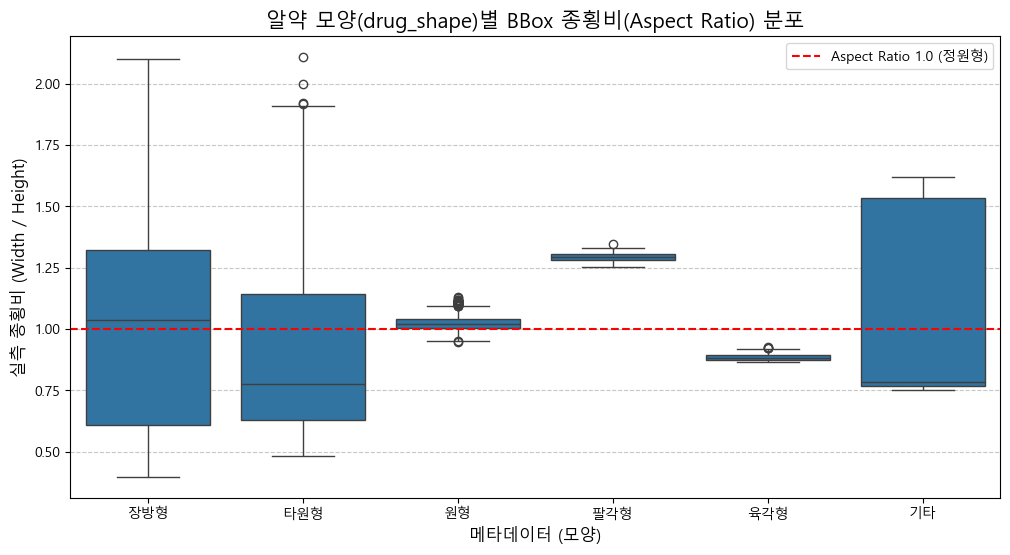

In [23]:
# 데이터 준비
shape_map_df = metadata_all_pills_df[['dl_name', 'drug_shape']].drop_duplicates()

# 'bbox_df'와 'shape_map_df'를 병합 ('class_name'과 'dl_name' 기준)
cross_validation_df = pd.merge(
    bbox_df, 
    shape_map_df, 
    left_on = 'class_name', 
    right_on = 'dl_name', 
    how = 'left'
)

# 바로 여기서 '가바토파정 100mg' 같이 'drug_shape' 정보가 없는 데이터는 제외시켜준다
cross_validation_df = cross_validation_df.dropna(subset = ['drug_shape'])

# 모양(Shape)별 종횡비(Aspect Ratio) 통계 분석
print("알약 모양(drug_shape)별 실제 BBox 종횡비(w/h) 통계")
shape_ar_stats = cross_validation_df.groupby('drug_shape')['aspect_ratio'].describe()
print(shape_ar_stats.to_string(float_format = "%.3f"))

# 이상치 탐지: 논리적 모순
print("\n" + "="*70)
print("메타데이터와 실측값의 논리적 모순")

# '원형'인데 종횡비가 1.0에서 크게 벗어난 경우
outlier_circle = cross_validation_df[
    (cross_validation_df['drug_shape'] == '원형') & 
    ((cross_validation_df['aspect_ratio'] < 0.7) | (cross_validation_df['aspect_ratio'] > 1.3))
]

# '장방형' 또는 '타원형'인데 종횡비가 1.0에 가까운 경우
outlier_rectangle = cross_validation_df[
    (cross_validation_df['drug_shape'].isin(['장방형', '타원형', '캡슐제'])) & 
    (cross_validation_df['aspect_ratio'] >= 0.9) & (cross_validation_df['aspect_ratio'] <= 1.1)
]

print(f"\n  - 이상치 1 ('원형' 아님): {len(outlier_circle)}개 발견")
if len(outlier_circle) > 0:
    print("    -> 예시 클래스 (상위 5개):")
    print(outlier_circle['class_name'].value_counts().head(5).to_string())

print(f"\n  - 이상치 2 ('장방형/타원형' 아님): {len(outlier_rectangle)}개 발견")
if len(outlier_rectangle) > 0:
    print("    -> 예시 클래스 (상위 5개):")
    print(outlier_rectangle['class_name'].value_counts().head(5).to_string())
    
# 시각화 (Boxplot)
print("\n" + "="*70)
print("모양별 종횡비 분포")

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'drug_shape', y = 'aspect_ratio', data = cross_validation_df)
plt.axhline(y = 1.0, color = 'r', linestyle = '--', label = 'Aspect Ratio 1.0 (정원형)')
plt.title('알약 모양(drug_shape)별 BBox 종횡비(Aspect Ratio) 분포', fontsize = 15)
plt.xlabel('메타데이터 (모양)', fontsize = 12)
plt.ylabel('실측 종횡비 (Width / Height)', fontsize = 12)
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

output_filename = 'shape_vs_aspect_ratio_boxplot.png'
plt.savefig(output_filename)

- 기대되는 종횡비(w/h)가 명확한 원형과 장방형/타원형 이 두 그룹만 검사했다
- 원형 (Circle): 수학적으로 종횡비(Aspect Ratio)가 무조건 1.0에 가까워야 한다 그래서 (종횡비 < 0.7) 이거나 (종횡비 > 1.3)처럼 1.0에서 크게 벗어나는 놈이 있는지 검사한다 (결과: 0개 발견)
- 장방형 (Rectangle) / 타원형 (Ellipse): 길쭉한 모양이므로 종횡비가 1.0에서 벗어나야 한다 그래서 (종횡비 >= 0.9) 이고 (종횡비 <= 1.1)처럼 오히려 1.0에 가까운 (즉, 정사각형/정원형에 가까운) 놈이 있는지 검사한다 (결과: 250개 발견)
- 나머지 모양(육각형, 팔각형, 기타)은 육각형/팔각형인 경우에는 통계표를 보면 육각형은 평균 0.886, 팔각형은 평균 1.295로, 그 자체로 일관된 종횡비를 가진다 원형이나 장방형처럼 명확한 논리적 모순을 정의하기 애매해서 검사에서 빠졌다
- 기타는 말그대로 기타라서 정해진 형태가 없으므로 검사할 기준 자체가 없다
- 촬영을 어떻게 하느냐에 따라 그리고 약을 어떻게 배치하느냐 등에 따라 BBox의 종횡비가 달라지는 것 같다
- 저 250개는 이상치가 아니다
- 오히려 모델이 더 다양하게 학습을 할 수 있을 것 같기도 하다

### BBox 이상치 확인

In [24]:
# 바운딩 박스 이상치 탐지
def find_bbox_outliers(bbox_df, img_w=976, img_h = 1280):
    # 이미지 경계를 벗어나는 바운딩 박스
    out_of_bound = bbox_df[
        (bbox_df['x_center'] - bbox_df['w']/2 < 0) | 
        (bbox_df['y_center'] - bbox_df['h']/2 < 0) | 
        (bbox_df['x_center'] + bbox_df['w']/2 > img_w) | 
        (bbox_df['y_center'] + bbox_df['h']/2 > img_h)
    ]
    
    # 비정상적으로 작거나 큰 바운딩 박스 (IQR)
    Q1 = bbox_df['area'].quantile(0.25)
    Q3 = bbox_df['area'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    size_outliers = bbox_df[
        (bbox_df['area'] < lower_bound) | 
        (bbox_df['area'] > upper_bound)
    ]
    
    return out_of_bound, size_outliers, lower_bound, upper_bound

# 이상치 탐지 실행
out_of_bound, size_outliers, lower_bound, upper_bound = find_bbox_outliers(bbox_df)

print(f"이미지 경계 벗어난 바운딩 박스: {len(out_of_bound)}개")
print(f"크기 이상치 바운딩 박스: {len(size_outliers)}개")
print(f"이상치 기준 - 작은쪽: {lower_bound:.1f}, 큰쪽: {upper_bound:.1f}")

이미지 경계 벗어난 바운딩 박스: 2개
크기 이상치 바운딩 박스: 74개
이상치 기준 - 작은쪽: -50949.6, 큰쪽: 200641.4


#### BBox 이상치 탐색

In [25]:
# 이상치 상세 분석
# 이미지 경계 벗어난 바운딩 박스 상세
if len(out_of_bound) > 0:
    print("이미지 경계를 벗어난 바운딩 박스:")
    for idx, row in out_of_bound.iterrows():
        print(f"  - 파일: {row['filename']}")
        print(f"    클래스: {row['class_name']}")
        print(f"    위치: ({row['x_center']:.1f}, {row['y_center']:.1f})")
        print(f"    크기: {row['w']}x{row['h']} (면적: {row['area']})")
else:
    print("이미지 경계를 벗어난 바운딩 박스 없음")

print("\n", '=' * 70)

# 크기 이상치 바운딩 박스 상세
if len(size_outliers) > 0:
    print(f"\n크기 이상치 바운딩 박스 ({len(size_outliers)}개):")
    
    # 너무 큰 바운딩 박스
    too_large = size_outliers[size_outliers['area'] > upper_bound]
    print(f"너무 큰 바운딩 박스: {len(too_large)}개")
    if len(too_large) > 0:
        print("대표적인 큰 바운딩 박스 클래스:")
        print(too_large['class_name'].value_counts().head(5))
    
    # 너무 작은 바운딩 박스
    too_small = size_outliers[size_outliers['area'] < lower_bound]
    print(f"너무 작은 바운딩 박스: {len(too_small)}개")
    if len(too_small) > 0:
        print("대표적인 작은 바운딩 박스 클래스:")
        print(too_small['class_name'].value_counts().head(5))

이미지 경계를 벗어난 바운딩 박스:
  - 파일: K-003351-016262-018357_0_2_0_2_75_000_200.png
    클래스: 종근당글리아티린연질캡슐(콜린알포세레이트) 
    위치: (6722.5, 782.5)
    크기: 311x315 (면적: 97965)
  - 파일: K-003544-004543-012247-016551_0_2_0_2_70_000_200.png
    클래스: 무코스타정(레바미피드)(비매품)
    위치: (761.5, 8997.5)
    크기: 217x217 (면적: 47089)


크기 이상치 바운딩 박스 (74개):
너무 큰 바운딩 박스: 74개
대표적인 큰 바운딩 박스 클래스:
class_name
자누메트엑스알서방정 100/1000mg       52
오마코연질캡슐(오메가-3-산에틸에스테르90)    12
제미메트서방정 50/1000mg            7
자누메트정 50/850mg               3
Name: count, dtype: int64
너무 작은 바운딩 박스: 0개


- 저 2개는 수정할 수 있으면 수정을 하고 안되면 삭제를 고려해본다
- 저 74개가 아까 BBox 면적을 늘린 것 같다 단순히 그냥 큰 알약들이라 생각되니 삭제하지 않는다
    - 예를 들어 오마코연질캡슐(12개)는 실제 크기가 2.4cm로 연질캡슐이며 삼키기 어려울 정도로 크기가 큰 것으로 매우 유명한 약이라고 한다

### BBox IoU 확인

In [26]:
# BBox 분석 시작
# master_data에서 모든 BBox 정보를 수집하고 DataFrame 생성

# BBox 종횡비 분석 (Aspect Ratio: w / h)
bbox_df['aspect_ratio'] = bbox_df['w'] / bbox_df['h']
# BBox 위치 분포 분석 (Normalized Center)
bbox_df['x_center_norm'] = bbox_df['x_center'] / IMG_W
bbox_df['y_center_norm'] = bbox_df['y_center'] / IMG_H

# IoU 계산 함수
# IoU 계산 함수 (Intersection over Union)
# BBox 형식: [x_center, y_center, w, h]를 사용하여 계산
def calculate_iou_from_center(box1, box2):
    # 형식: [xc, yc, w, h]
    xc1, yc1, w1, h1 = box1
    xc2, yc2, w2, h2 = box2
    
    # BBox를 [x_min, y_min, x_max, y_max] 형식으로 변환
    x_min1, y_min1 = xc1 - w1/2, yc1 - h1/2
    x_max1, y_max1 = xc1 + w1/2, yc1 + h1/2
    
    x_min2, y_min2 = xc2 - w2/2, yc2 - h2/2
    x_max2, y_max2 = xc2 + w2/2, yc2 + h2/2

    # 교차 영역 (Intersection) 좌표
    x_left = max(x_min1, x_min2)
    y_top = max(y_min1, y_min2)
    x_right = min(x_max1, x_max2)
    y_bottom = min(y_max1, y_max2)

    # 교차 영역 면적
    if x_right < x_left or y_bottom < y_top:
        return 0.0 # 교차 영역이 없으면 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # 합집합 영역 (Union) 면적
    area1 = w1 * h1
    area2 = w2 * h2
    union_area = area1 + area2 - intersection_area

    # IoU 계산
    return intersection_area / union_area

# IoU 계산 데이터 준비 및 실행
# 이미지별 BBox 쌍의 IoU 분석
all_iou_values = []
# master_data를 이미지별로 IoU 계산에 필요한 BBox 리스트로 변환
# { 'filename': [[x_center, y_center, w, h], ...], ... }
image_bboxes = defaultdict(list)

# 필요한 컬럼만 추출하여 BBox 리스트 생성 (순서 통일: [x_center, y_center, w, h])
for _, row in bbox_df.iterrows():
    # BBox는 [x_center, y_center, w, h] 형식으로 저장
    bbox_data = [row['x_center'], row['y_center'], row['w'], row['h']]
    image_bboxes[row['filename']].append(bbox_data)

# 이미지별 BBox 쌍 IoU 계산
for filename, bboxes in tqdm(image_bboxes.items(), desc="Calculating IoU"):
    num_bboxes = len(bboxes)
    if num_bboxes < 2:
        continue # 객체가 1개 이하면 IoU 계산 불필요

    # 모든 BBox 쌍에 대해 IoU 계산
    for i in range(num_bboxes):
        for j in range(i + 1, num_bboxes):
            # 수정된 중심 좌표 기반 IoU 함수 사용 (통일된 형식)
            iou = calculate_iou_from_center(bboxes[i], bboxes[j])
            all_iou_values.append(iou)

iou_df = pd.Series(all_iou_values, name='IoU')

print("\n" + "=" * 60)

# IoU 분포 통계
print("\n1. IoU 값 분포 통계")
print(iou_df.describe().to_string())

# 2. 겹침 수준별 BBox 쌍 개수
# IoU 임계값: 0.5 이상은 '높은 겹침', 0.2 이상은 '중간 겹침'으로 분류
HIGH_OVERLAP_THRESHOLD = 0.5
MEDIUM_OVERLAP_THRESHOLD = 0.1

high_overlap = len(iou_df[iou_df >= HIGH_OVERLAP_THRESHOLD])
medium_overlap = len(iou_df[(iou_df >= MEDIUM_OVERLAP_THRESHOLD) & (iou_df < HIGH_OVERLAP_THRESHOLD)])
low_overlap = len(iou_df[iou_df < MEDIUM_OVERLAP_THRESHOLD])

total_pairs = len(iou_df)

print("\n2. BBox 겹침 수준별 개수")
print(f"총 BBox 쌍 개수: {total_pairs}개")
print(f"- 높은 겹침 (IoU >= {HIGH_OVERLAP_THRESHOLD}): {high_overlap}개 ({high_overlap / total_pairs:.1%})")
print(f"- 중간 겹침 ({MEDIUM_OVERLAP_THRESHOLD} <= IoU < {HIGH_OVERLAP_THRESHOLD}): {medium_overlap}개 ({medium_overlap / total_pairs:.1%})")
print(f"- 낮은 겹침 (IoU < {MEDIUM_OVERLAP_THRESHOLD}): {low_overlap}개 ({low_overlap / total_pairs:.1%})")


# IoU >= 0.2인 이미지 파일 탐지
# IoU 임계값을 0.2로 설정하여 중간 겹침까지 포함
# IoU >= 0.1인 이미지 파일 탐지 (임계값을 0.1로 변경)
HIGH_IOU_THRESHOLD = 0.1  # 이 줄만 0.2 → 0.1로 변경
high_iou_files = set()

# image_bboxes 딕셔너리를 사용하여 파일명 기반으로 탐색
for filename, bboxes in image_bboxes.items():
    num_bboxes = len(bboxes)
    if num_bboxes < 2:
        continue # 객체가 1개 이하면 IoU 계산 불필요 

    is_high_overlap = False
    
    # 모든 BBox 쌍에 대해 IoU 계산
    for i in range(num_bboxes):
        for j in range(i + 1, num_bboxes):
            
            # BBox 데이터 [x_center, y_center, w, h]
            xc1, yc1, w1, h1 = bboxes[i]
            xc2, yc2, w2, h2 = bboxes[j]
            
            # [x_min, y_min, x_max, y_max] 형식으로 변환
            x_min1, y_min1 = xc1 - w1/2, yc1 - h1/2
            x_max1, y_max1 = xc1 + w1/2, yc1 + h1/2
            x_min2, y_min2 = xc2 - w2/2, yc2 - h2/2
            x_max2, y_max2 = xc2 + w2/2, yc2 + h2/2
            
            # 교차 영역 (Intersection) 계산
            x_left = max(x_min1, x_min2)
            y_top = max(y_min1, y_min2)
            x_right = min(x_max1, x_max2)
            y_bottom = min(y_max1, y_max2)

            if x_right < x_left or y_bottom < y_top:
                iou = 0.0
            else:
                intersection_area = (x_right - x_left) * (y_bottom - y_top)
                area1 = w1 * h1
                area2 = w2 * h2
                union_area = area1 + area2 - intersection_area
                iou = intersection_area / union_area

            # IoU가 임계값(0.1)을 초과하면 해당 파일명을 기록
            if iou >= HIGH_IOU_THRESHOLD:
                high_iou_files.add(filename)
                is_high_overlap = True
                break
        if is_high_overlap:
            break

print(f"\nIoU >= {HIGH_IOU_THRESHOLD}인 높은/중간 겹침 BBox를 포함하는 이미지 파일:")
for filename in high_iou_files:
    print(f"- {filename}")

Calculating IoU: 100%|██████████| 1489/1489 [00:00<00:00, 372432.38it/s]



1. IoU 값 분포 통계
count    5138.000000
mean        0.001225
std         0.032584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

2. BBox 겹침 수준별 개수
총 BBox 쌍 개수: 5138개
- 높은 겹침 (IoU >= 0.5): 5개 (0.1%)
- 중간 겹침 (0.1 <= IoU < 0.5): 4개 (0.1%)
- 낮은 겹침 (IoU < 0.1): 5129개 (99.8%)

IoU >= 0.1인 높은/중간 겹침 BBox를 포함하는 이미지 파일:
- K-002483-003743-012081-019552_0_2_0_2_90_000_200.png
- K-001900-016548-019607-033009_0_2_0_2_70_000_200.png
- K-003351-020238-031863_0_2_0_2_70_000_200.png
- K-003351-003832-029667_0_2_0_2_90_000_200.png
- K-003483-027733-030308-036637_0_2_0_2_90_000_200.png
- K-003483-019861-025367-029667_0_2_0_2_90_000_200.png
- K-003351-018147-020238_0_2_0_2_90_000_200.png
- K-003483-019861-020238-031885_0_2_0_2_70_000_200.png
- K-003351-029667-031863_0_2_0_2_70_000_200.png


- BBox가 겹치는 경우는 거의 없다
- 높은/중간 겹침 BBox를 포함하는 이미지 파일들은 직접 확인을 해봐야겠다
- 눈으로 확인해서 오류면 수정이나 삭제를 고려해본다
- NMS(Non-Maximum Suppression) 임계값을 보수적으로 설정할 수도 있겠다

#### IoU 겹침 이상치 확인

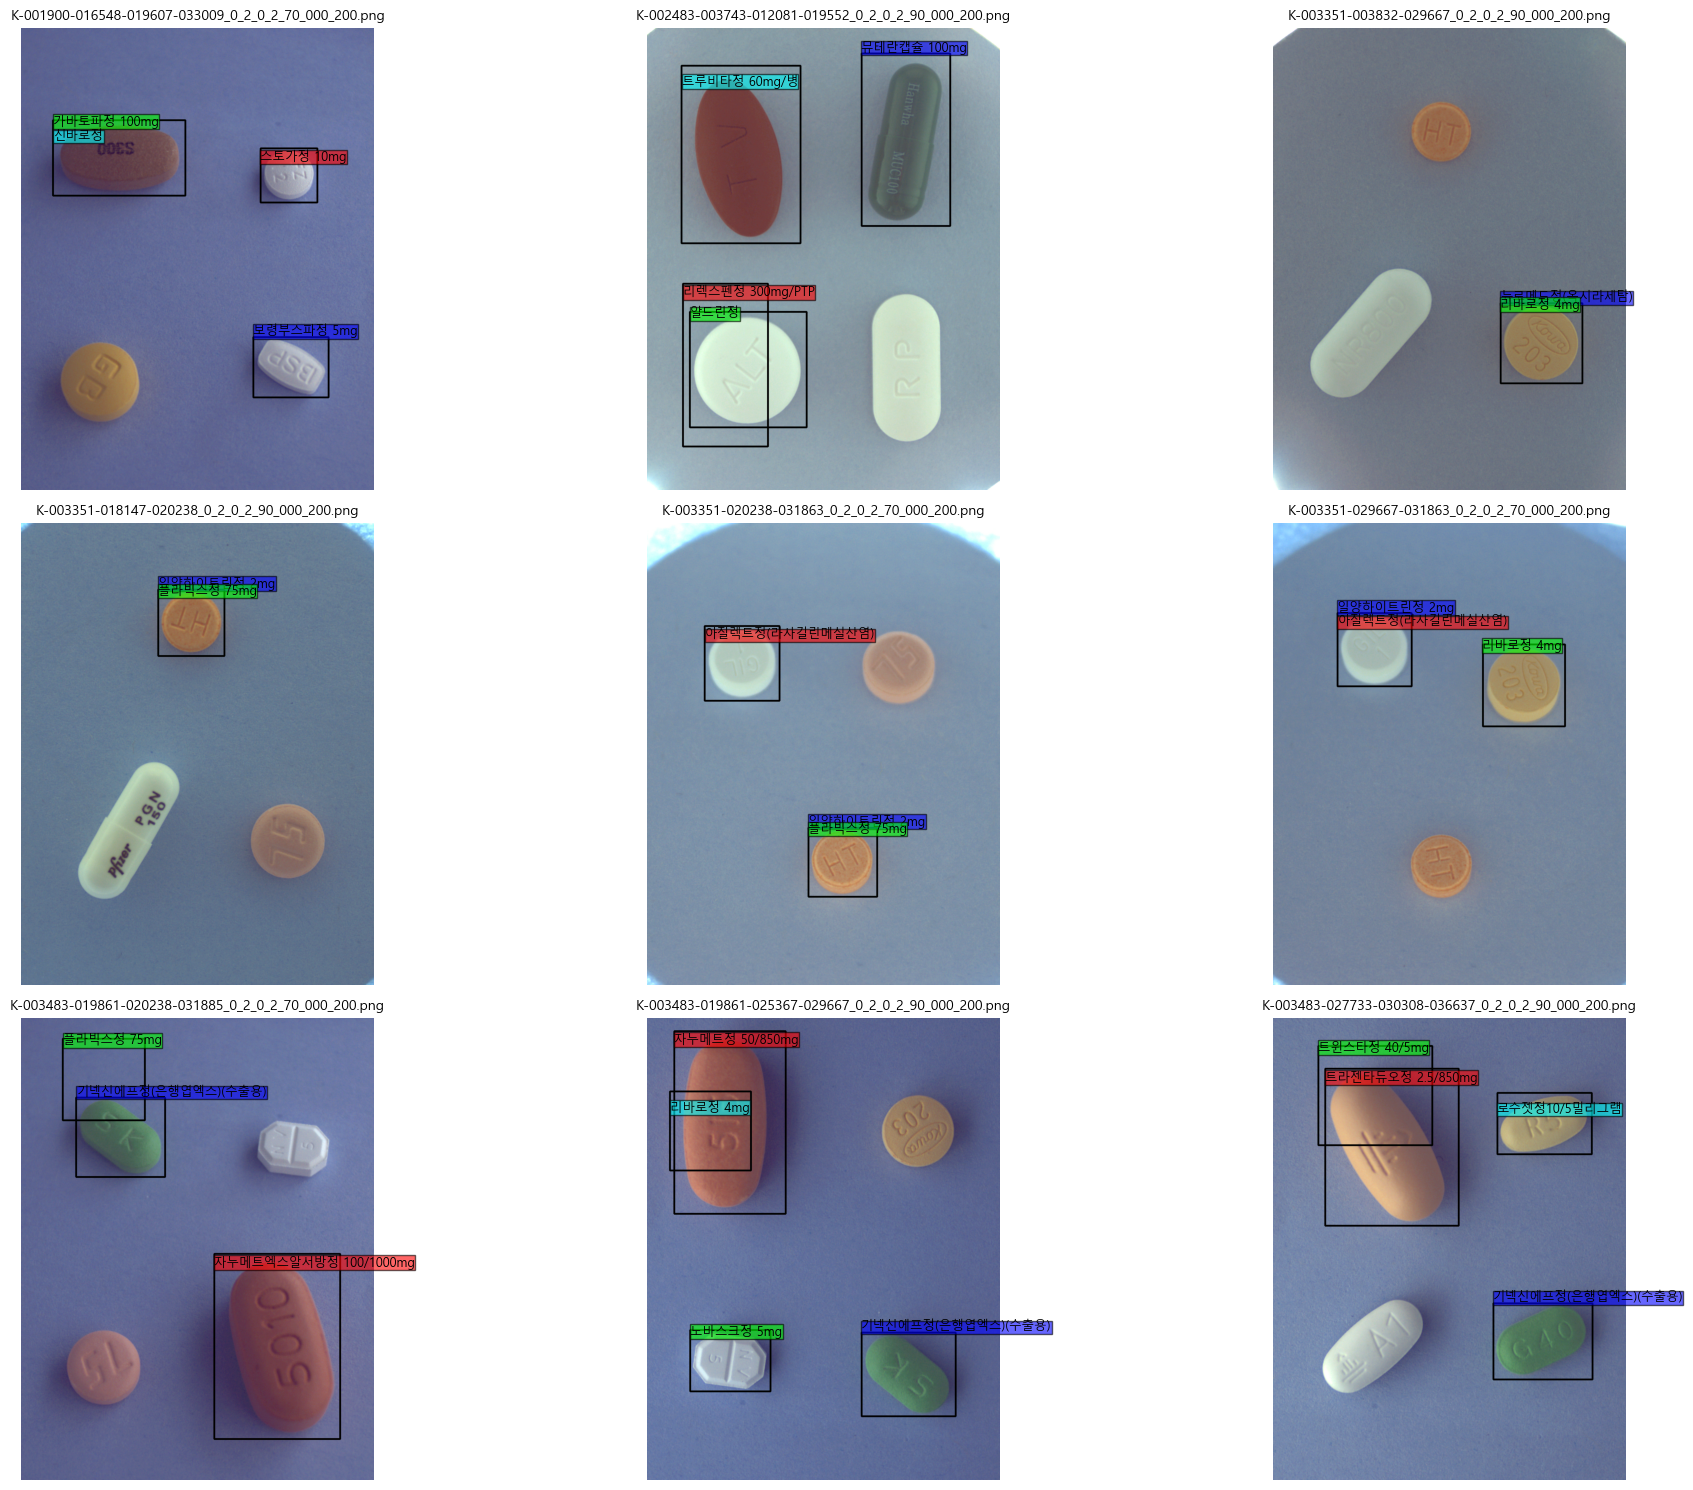

In [27]:
# 9개 파일명 리스트로 변환
overlap_filenames = sorted(list(high_iou_files))

# BBox를 그릴 색상 (B, G, R) - 최대 4개
COLORS = [
    (255, 0, 0),  # Blue
    (0, 255, 0),  # Green
    (0, 0, 255),  # Red
    (255, 255, 0) # Yellow
]

# 3x3 그리드로 설정 (4x2 → 3x3으로 변경)
plt.figure(figsize = (20, 15))  # 사이즈도 약간 조정

for i, img_filename in enumerate(overlap_filenames):
    img_path = os.path.join(train_img_dir, img_filename)
    
    # 이미지 로드 (OpenCV: BGR)
    image = cv2.imread(img_path)
    if image is None:
        print(f"오류: '{img_path}' 로드 실패. 다음으로 넘어갑니다.")
        continue
        
    # 이미지 -> RGB (Matplotlib 용)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # master_data에서 어노테이션 정보 가져오기
    annotations = master_data[img_filename]['annotations']
    
    # 서브플롯 생성 (4,2, i+1 → 3,3, i+1으로 변경)
    plt.subplot(3, 3, i + 1)
    
    # 이미지에 BBox와 텍스트 그리기
    for j, ann in enumerate(annotations):
        # BBox 좌표 [x, y, w, h]
        x, y, w, h = map(int, ann['bbox'])
        
        # 클래스 ID로 이름 찾기
        class_id = ann['class_id']
        class_name = id_to_class.get(class_id, "Unknown")
        
        # 색상 선택 (Matplotlib RGB 0~1 스케일)
        color_bgr = COLORS[j % len(COLORS)] 
        color_rgb = (color_bgr[2]/255, color_bgr[1]/255, color_bgr[0]/255) 
        
        # 사각형 그리기
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), color_rgb, thickness=3)
        
        # 텍스트 그리기 (j*20 : 텍스트가 겹치지 않게 y위치 살짝 조정)
        plt.text(x, y - 5 + (j*20), class_name, 
                 color='black', 
                 fontsize=9, 
                 bbox=dict(facecolor=color_rgb, alpha=0.6, pad=0.1))

    # 서브플롯에 이미지 표시
    plt.imshow(image_rgb)
    plt.title(f"{img_filename}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
output_filename = 'overlapping_bboxes_visualization.png'
plt.savefig(output_filename)

- 실제로 겹치는 것들이 있다
- 겹치는 것들은 수정을 시도 해보고 안되면 삭제를 한다

#### 오류 파일 삭제

In [10]:
# 삭제할 파일 목록 리스트업 (총 11개)
iou_error_files = [
    "K-003351-018147-020238_0_2_0_2_90_000_200.png",
    "K-003483-027733-030308-036637_0_2_0_2_90_000_200.png",
    "K-003351-020238-031863_0_2_0_2_70_000_200.png",
    "K-003351-029667-031863_0_2_0_2_70_000_200.png",
    "K-003483-019861-025367-029667_0_2_0_2_90_000_200.png",
    "K-002483-003743-012081-019552_0_2_0_2_90_000_200.png",
    "K-003483-019861-020238-031885_0_2_0_2_70_000_200.png",
    "K-003351-003832-029667_0_2_0_2_90_000_200.png",
    "K-001900-016548-019607-033009_0_2_0_2_70_000_200.png"
]

oob_error_files = [
    "K-003351-016262-018357_0_2_0_2_75_000_200.png",
    "K-003544-004543-012247-016551_0_2_0_2_70_000_200.png"
]

files_to_delete = iou_error_files + oob_error_files

# master_data에서 해당 파일들 삭제
deleted_count = 0
print(f"삭제 전 원본 master_data 개수: {len(master_data)}개")

for filename in files_to_delete:
    # master_data에 해당 키(파일명)가 있는지 확인
    if filename in master_data:
        # 딕셔너리에서 해당 항목 삭제
        del master_data[filename]
        deleted_count += 1
        # print(f"삭제 완료: {filename}") # 확인용 로그
    else:
        # 혹시 모르니 master_data에 파일이 없는 경우 로그
        print(f"경고: {filename}이 master_data에 없음")

print(f"총 {deleted_count}개의 오류 파일을 삭제")
print(f"정제 후 master_data 개수: {len(master_data)}개")

삭제 전 원본 master_data 개수: 1489개
총 11개의 오류 파일을 삭제
정제 후 master_data 개수: 1478개


IoU >= 0.1인 높은/중간 겹침 BBox를 포함하는 이미지 파일:
- K-003351-003832-029667_0_2_0_2_90_000_200.png
- K-003483-019861-020238-031885_0_2_0_2_70_000_200.png
- K-003351-020238-031863_0_2_0_2_70_000_200.png
- K-003483-019861-025367-029667_0_2_0_2_90_000_200.png
- K-001900-016548-019607-033009_0_2_0_2_70_000_200.png
- K-002483-003743-012081-019552_0_2_0_2_90_000_200.png
- K-003483-027733-030308-036637_0_2_0_2_90_000_200.png
- K-003351-029667-031863_0_2_0_2_70_000_200.png
- K-003351-018147-020238_0_2_0_2_90_000_200.png

이미지 경계를 벗어난 바운딩 박스:
- K-003351-016262-018357_0_2_0_2_75_000_200.png
- K-003544-004543-012247-016551_0_2_0_2_70_000_200.png

삭제를 해주었다

In [11]:
# 클린셋 추출
# clean_files 리스트를 사용
clean_master_data = {}

for filename in clean_files:
    # 1,478개의 master_data에서 clean_files 목록에 있는 파일만 골라서
    if filename in master_data:
        # clean_master_data 라는 새 딕셔너리에 복사
        clean_master_data[filename] = master_data[filename]

print(f"총 {len(master_data)}개 데이터 중,")
print(f"최종 클린 데이터셋 생성 완료: {len(clean_master_data)}개")

총 1478개 데이터 중,
최종 클린 데이터셋 생성 완료: 632개


- 그리고 위에서 확인했던 파일명 개수와 어노테이션 개수가 일치하는 클린한 것들만 클린셋으로 만들어준다
- BBox 오류가 있었던 11개 중에서 7개가 포함됐었던 것 같다(오류 11개 삭제후에 클린셋의 변화 639개 => 632개)
- 이제 이 클린셋으로만 데이터 분할을 시작한다
- YOLO로 하기로 정해졌다 이제부터 YOLO에 맞춰서 진행한다

# YOLO 실험 시작

In [ ]:
%pip install ultralytics

# 데이터셋

### 데이터 분할 준비

In [12]:
# 클린셋 기준 클래스 분포 재분석
clean_class_names = []
# 11개 삭제 후 632개만 뽑은 clean_master_data를 사용한다
for img_data in clean_master_data.values():
    for ann in img_data['annotations']:
        clean_class_names.append(ann['class_name'])

clean_class_counts = Counter(clean_class_names)

# Stratified Split에 사용할 클래스별 전체 개수 Lookup Table
class_count_lookup = dict(clean_class_counts)

print(f"클린셋(632개 이미지)의 총 BBox 수: {len(clean_class_names)}")
print(f"클린셋의 고유 클래스 수: {len(clean_class_counts)}")

클린셋(632개 이미지)의 총 BBox 수: 2381
클린셋의 고유 클래스 수: 73


- 클린셋만 분리해냈다
- 클래스 수는 유지된다
- 클래스 분포가 엉망이었다
- Stratified Split을 해준다

### 데이터 분할 & 데이터셋 생성 & 데이터로더 생성

### 데이터 분할

In [ ]:
# Stratified Split을 위한 데이터 준비


X_filenames = [] # 632개 이미지 파일명
y_stratify_labels = [] # 632개 이미지의 대표 클래스 (가장 희귀한)

for filename, data in clean_master_data.items():
    if not data['annotations']:
        continue # 어노테이션이 없는 이미지는 스킵

    X_filenames.append(filename)
    
    # 이 이미지에 포함된 모든 클래스 이름
    img_classes = [ann['class_name'] for ann in data['annotations']]
    
    # 각 클래스의 전체 개수 (위에서 만든 lookup 테이블 참조)
    counts = [class_count_lookup.get(name, 99999) for name in img_classes]
    
    # 개수가 가장 적은 클래스를 이 이미지의 대표로 선정
    rarest_class_name = img_classes[np.argmin(counts)]
    y_stratify_labels.append(rarest_class_name)

print(f"분할 준비 완료: X (파일명) {len(X_filenames)}개, y (대표 레이블) {len(y_stratify_labels)}개")

분할 준비 완료: X (파일명) 632개, y (대표 레이블) 632개


### 데이터셋 생성

In [14]:
import shutil
from sklearn.model_selection import train_test_split

# YOLO 포맷 변환 함수
def convert_to_yolo_format(bbox, img_width, img_height):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height
    return x_center, y_center, width, height


# Train/Val Split (Stratified)
# 앞에서 준비한 X_filenames, y_stratify_labels 사용
train_files, val_files = train_test_split(
    X_filenames, 
    test_size = 0.2,  # 80:20 비율
    stratify = y_stratify_labels,
    random_state = 42
)

print(f"Train: {len(train_files)}개, Val: {len(val_files)}개")


# YOLO 폴더 구조 생성
yolo_base_dir = os.path.join(base_dir, "yolo_dataset")
os.makedirs(yolo_base_dir, exist_ok=True)

for split in ['train', 'val']:
    os.makedirs(os.path.join(yolo_base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(yolo_base_dir, split, 'labels'), exist_ok=True)


# 이미지/라벨 파일 생성
def create_yolo_dataset(file_list, split_name):
    # 이미지 복사 + YOLO 라벨 txt 파일 생성
    for filename in tqdm(file_list, desc=f"Creating {split_name} dataset"):
        img_data = clean_master_data[filename]
        
        # 원본 이미지 경로
        src_img_path = os.path.join(train_img_dir, filename)
        
        # YOLO 대상 경로
        dst_img_path = os.path.join(yolo_base_dir, split_name, 'images', filename)
        
        # 이미지 복사
        shutil.copy(src_img_path, dst_img_path)
        
        # YOLO 라벨 파일 생성 (.txt)
        label_filename = filename.replace('.png', '.txt')
        label_path = os.path.join(yolo_base_dir, split_name, 'labels', label_filename)
        
        with open(label_path, 'w') as f:
            for ann in img_data['annotations']:
                class_id = ann['class_id']
                bbox = ann['bbox']
                
                # YOLO 포맷 변환
                x_center, y_center, width, height = convert_to_yolo_format(
                    bbox, img_data['width'], img_data['height']
                )
                
                # 파일에 쓰기 (class_id x_center y_center width height)
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Train/Val 데이터셋 생성
create_yolo_dataset(train_files, 'train')
create_yolo_dataset(val_files, 'val')


# data.yaml 생성
yaml_content = f"""# YOLO Dataset Configuration
path: {yolo_base_dir}
train: train/images
val: val/images

# Classes
nc: {len(class_to_id)}  # number of classes
names: {list(class_to_id.keys())}
"""

yaml_path = os.path.join(yolo_base_dir, 'data.yaml')
with open(yaml_path, 'w', encoding='utf-8') as f:
    f.write(yaml_content)

print(f"\nYOLO 데이터셋 생성 완료")
print(f"위치: {yolo_base_dir}")
print(f"설정 파일: {yaml_path}")

Train: 505개, Val: 127개


Creating val dataset: 100%|██████████| 127/127 [00:00<00:00, 479.24it/s]


YOLO 데이터셋 생성 완료
위치: E:\pytorch_env\ai05-level1-project\yolo_dataset
설정 파일: E:\pytorch_env\ai05-level1-project\yolo_dataset\data.yaml


데이터셋도 YOLO에 맞춰서 생성한다

# 학습 & 검증 시작

In [ ]:
import shutil
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
import os
import re

# 데이터가 들어 있는 프로젝트 폴더 (yolo_dataset 포함)
data_dir = r"E:\pytorch_env\ai05-level1-project"

# 모델 제출 파일을 저장할 Exp 폴더
base_dir = r"E:\pytorch_env\ai05-level1-project\Exp1"

train_img_dir = os.path.join(data_dir, "train_images")
test_img_dir  = os.path.join(data_dir, "test_images")
yaml_path     = os.path.join(data_dir, "yolo_dataset", "data.yaml")

model_save_dir = os.path.join(base_dir, "models")
submission_dir = os.path.join(base_dir, "submissions")

os.makedirs(model_save_dir, exist_ok = True)
os.makedirs(submission_dir, exist_ok = True)

print("="*60)
print("경로 설정 완료")
print("="*60)

# 모델 선택
# MODEL_NAME 설명:
# - yolov8n.pt : Nano    가장 빠름, 메모리 적게, 성능 낮음 (기본)
# - yolov8s.pt : Small   속도·정확도 균형 (추천)
# - yolov8m.pt : Medium  성능 ↑, 메모리 ↑
# - yolov8l.pt : Large   성능 더 ↑, 느리고 메모리 많이
# - yolov8x.pt : XLarge  최고 성능, GPU 필수

# - yolo11n.pt : Nano (가장 가볍고 빠름)
# - yolo11s.pt : Small (속도·정확도 균형, 추천)
# - yolo11m.pt : Medium
# - yolo11l.pt : Large
# - yolo11x.pt : XLarge (최고 성능, GPU 필수)

# - yolo26n.pt : Nano (가볍고 빠름)
# - yolo26s.pt : Small (속도·정확도 균형, 추천 시작점)
# - yolo26m.pt : Medium
# - yolo26l.pt : Large
# - yolo26x.pt : XLarge (최고 성능, GPU 메모리 많이 필요)

# 학습
print("\n학습 시작")
model = YOLO('yolov8s.pt')

results = model.train(
    data = yaml_path,
    epochs = 200,
    imgsz = 640,
    batch = 8,
    device = 0,
    project = model_save_dir,
    name = 'yolo_v1',
    exist_ok = True,
    patience = 20, 
    lr0 = 0.01,   
    optimizer = 'AdamW', 
    augment = True,   
    close_mosaic = 10
)

best_pt = os.path.join(model_save_dir, 'yolo_v1', 'weights', 'best.pt')
print(f"\n학습 완료 모델 저장: {best_pt}")

# 검증 (val)
print("\n모델 검증")
model = YOLO(best_pt)
metrics = model.val()

print(f"mAP50     : {metrics.box.map50:.3f}")
print(f"mAP50-95  : {metrics.box.map:.3f}")

# Test 추론 & 제출 파일 생성 (수정된 부분)
print("\nTest 추론 시작")
submission_data = []
annotation_id = 1

test_images = sorted([f for f in os.listdir(test_img_dir) if f.endswith('.png')])

# 테스트 이미지 ID 매핑 생성
test_image_mapping = {}
for img_file in test_images:
    # 파일명에서 숫자 부분 추출
    numbers = re.findall(r'\d+', img_file)
    if numbers:
        image_id = int(max(numbers, key=len))  # 가장 긴 숫자 시퀀스 사용
    else:
        # 숫자가 없으면 파일명에서 .png 제거
        image_id = int(img_file.replace('.png', ''))
    test_image_mapping[img_file] = image_id

for img_file in tqdm(test_images, desc="Inference"):
    img_path = os.path.join(test_img_dir, img_file)
    
    # 숫자 image_id 사용
    image_id = test_image_mapping[img_file]
    
    results = model.predict(
        source = img_path,
        conf = 0.25,
        iou = 0.45,
        verbose = False,
    )
    
    for result in results:
        boxes = result.boxes
        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy()
            conf = boxes.conf[i].cpu().item()
            cls = int(boxes.cls[i].cpu().item())
            
            # 제출 형식에 맞게 수정
            submission_data.append({
                'annotation_id': annotation_id,
                'image_id': image_id,           # 숫자 ID
                'category_id': cls + 1,         # 1-based (0-based + 1)
                'bbox_x': int(round(x1)),       # 정수형
                'bbox_y': int(round(y1)),       # 정수형
                'bbox_w': int(round(x2 - x1)),  # 정수형
                'bbox_h': int(round(y2 - y1)),  # 정수형
                'score': round(conf, 2)         # 소수점 2자리
            })
            annotation_id += 1

# 저장
submission_df = pd.DataFrame(submission_data)
col_order = ['annotation_id', 'image_id', 'category_id', 'bbox_x', 'bbox_y', 'bbox_w', 'bbox_h', 'score']
submission_df = submission_df[col_order]

submission_path = os.path.join(submission_dir, 'submission_v1.csv')
submission_df.to_csv(submission_path, index=False)

print(f"\n{'='*60}")
print(f"제출 파일 생성 완료")
print(f"{'='*60}")
print(f"총 예측      : {len(submission_df):,}개")
print(f"고유 이미지   : {submission_df['image_id'].nunique()}개")
print(f"파일 위치    : {submission_path}")
print(f"\n[미리보기]")
print(submission_df.head(10))

경로 설정 완료

학습 시작
New https://pypi.org/project/ultralytics/8.3.221 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.220  Python-3.11.14 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=E:\pytorch_env\ai05-level1-project\test_images_2\yolo_dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosai

RuntimeError: Dataset 'E://pytorch_env/ai05-level1-project/test_images_2/yolo_dataset/data.yaml' error  'E:\pytorch_env\ai05-level1-project\test_images_2\yolo_dataset\data.yaml' does not exist

- 11개의 파일을 삭제하고 오류셋에 파일들 800여 개를 제외하고 학습을 했는데 성능이 비약적으로 좋아졌다
- 이미 굉장히 높은 점수가 나온 것 같다 이제 1 - 2점 올리는게 힘들어질 것 같다 여러 실험을 해봐야겠다

In [18]:
import os
import shutil
import json
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

# 기본 경로 설정 (이미 정의된 변수 사용)
# base_dir, train_img_dir 변수가 이미 메모리에 있다고 가정

# 님의 분석 코드에서 생성된 변수를 사용
print(f"이미 로드된 master_data (오류 11개 제거됨): {len(master_data)}개")
print(f"이미 로드된 clean_master_data: {len(clean_master_data)}개")

# [오류셋] 850개 레코드에서 파일명만 추출
error_filenames_initial = [record['filename'] for record in error_records]

# [오류셋] 850개 중 IoU/OOB 오류(11개)에 포함된 파일 제외
final_error_filenames = [f for f in error_filenames_initial if f not in files_to_delete]

# [클린셋] 632개 데이터에서 파일명 리스트 추출
final_clean_filenames = list(clean_master_data.keys())

print(f"\n[최종 분리 결과]")
print(f"  1단계 학습용 클린셋: {len(final_clean_filenames)}개")
print(f"  2단계 예측용 오류셋: {len(final_error_filenames)}개")
print(f"  (총 {len(final_clean_filenames) + len(final_error_filenames)}개 = 원본 {len(master_data)}개)")

# 데이터셋을 저장할 새 폴더 생성
output_clean_dir = os.path.join(base_dir, "A_CleanSet_for_Training")
output_error_dir = os.path.join(base_dir, "B_ErrorSet_for_Prediction")

os.makedirs(os.path.join(output_clean_dir, "images"), exist_ok=True)
os.makedirs(os.path.join(output_clean_dir, "labels"), exist_ok=True)
os.makedirs(os.path.join(output_error_dir, "images"), exist_ok=True)

print(f"\n클린셋 폴더 생성: {output_clean_dir}")
print(f"오류셋 폴더 생성: {output_error_dir}")

# YOLO 라벨 변환 함수 (님의 분석 코드에 아직 없음)
def convert_to_yolo_format(bbox, img_width, img_height):
    x, y, w, h = bbox
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    width = w / img_width
    height = h / img_height
    return x_center, y_center, width, height

# 이미지 복사 및 YOLO 라벨 생성 함수
def process_dataset_split(filename_list, data_source, 
                          target_img_dir, target_label_dir=None):
    
    desc = f"Processing {os.path.basename(target_img_dir)}"
    copied_images = 0
    created_labels = 0
    
    for filename in tqdm(filename_list, desc=desc):
        # 이미지 복사
        src_path = os.path.join(train_img_dir, filename)
        dst_path = os.path.join(target_img_dir, filename)
        
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
            copied_images += 1
        else:
            print(f"경고: 원본 이미지 없음 - {src_path}")
            continue
            
        # 라벨 생성 (클린셋에만 해당)
        if target_label_dir:
            img_data = data_source.get(filename)
            if not img_data:
                print(f"경고: 어노테이션 정보 없음 - {filename}")
                continue
                
            label_file = filename.replace('.png', '.txt').replace('.jpg', '.txt')
            label_path = os.path.join(target_label_dir, label_file)
            
            # class_to_id 변수가 메모리에 있다고 가정
            if 'class_to_id' not in globals():
                 print("오류: class_to_id 딕셔너리가 없습니다. 이전 셀을 실행하세요.")
                 break
            
            img_width = img_data['width']
            img_height = img_data['height']
            
            with open(label_path, 'w', encoding='utf-8') as f:
                for ann in img_data['annotations']:
                    # class_name으로 class_id를 다시 찾아야 함
                    class_name = ann['class_name']
                    class_id = class_to_id.get(class_name) 
                    
                    if class_id is None:
                        print(f"경고: class_to_id에 {class_name}이 없습니다.")
                        continue
                        
                    bbox = ann['bbox']
                    
                    if bbox[2] > 0 and bbox[3] > 0:
                        x_c, y_c, w, h = convert_to_yolo_format(bbox, img_width, img_height)
                        f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")
                        created_labels += 1

    print(f"  -> {copied_images}개 이미지 복사 완료.")
    if target_label_dir:
        print(f"  -> {created_labels}개 YOLO 라벨 생성 완료.")

# 코드 실행

# [클린셋] 처리: 이미지 복사 + YOLO 라벨 생성
process_dataset_split(
    final_clean_filenames,
    clean_master_data,  # ★ 진짜 632개 클린셋 데이터 사용
    os.path.join(output_clean_dir, "images"),
    os.path.join(output_clean_dir, "labels")
)

# [오류셋] 처리: 이미지 복사 (라벨 생성 안 함)
process_dataset_split(
    final_error_filenames, # ★ 진짜 오류셋 파일명 리스트 사용
    master_data,
    os.path.join(output_error_dir, "images"),
    None  # 라벨 생성 안 함
)

print("\n---모든 작업 완료 ---")
print(f"1단계 학습용 클린셋: {output_clean_dir}")
print(f"2단계 예측용 오류셋: {output_error_dir}")


이미 로드된 master_data (오류 11개 제거됨): 1478개
이미 로드된 clean_master_data: 632개

[최종 분리 결과]
  1단계 학습용 클린셋: 632개
  2단계 예측용 오류셋: 846개
  (총 1478개 = 원본 1478개)

클린셋 폴더 생성: E:\pytorch_env\ai05-level1-project\Exp\A_CleanSet_for_Training
오류셋 폴더 생성: E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction


Processing images: 100%|██████████| 632/632 [00:00<00:00, 732.90it/s]


  -> 632개 이미지 복사 완료.
  -> 2381개 YOLO 라벨 생성 완료.


Processing images: 100%|██████████| 846/846 [00:01<00:00, 758.22it/s]

  -> 846개 이미지 복사 완료.

---모든 작업 완료 ---
1단계 학습용 클린셋: E:\pytorch_env\ai05-level1-project\Exp\A_CleanSet_for_Training
2단계 예측용 오류셋: E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction


### 임의 경로 수정


In [25]:
import os, glob
from ultralytics import YOLO

# --- 경로 수정 ---
# base_dir = r"E:\pytorch_env\ai05-level1-project\Exp"  # ← Exp 포함
best_pt_path = r"E:\pytorch_env\ai05-level1-project\Exp\models\yolo_v1\weights\best.pt"
error_set_img_dir = r"E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)"

# 출력 폴더(원하는 곳)
output_root = r"E:\pytorch_env\ai05-level1-project\image_set\predict"
os.makedirs(output_root, exist_ok=True)
print("예측 결과 루트:", output_root)

# --- 사전 점검 ---
assert os.path.isfile(best_pt_path), f"best.pt 없음: {best_pt_path}"
assert os.path.isdir(error_set_img_dir), f"이미지 폴더 없음: {error_set_img_dir}"
num_imgs = len(glob.glob(os.path.join(error_set_img_dir, "*.*")))
print(f"예측 대상 이미지 수: {num_imgs}장")
assert num_imgs > 0, "예측할 이미지가 0장입니다. 경로를 확인하세요."

# --- 모델 로드 ---
model = YOLO(best_pt_path)
print("모델 로드 성공.")

# --- 예측 ---
results = model.predict(
    source=error_set_img_dir,
    imgsz=1024,
    conf=0.55,      # 오탐 줄이려면 0.5~0.6 권장
    iou=0.6,
    device=0,       # GPU 없으면 -1
    batch=16,
    save=True,      # 시각화 이미지 저장
    save_txt=True,  # YOLO txt 저장
    save_conf=True, # txt에 conf 포함
    project=output_root,
    name="pred_v1",
    exist_ok=True,
    verbose=True
)

print("\n--- 예측 완료 ---")
print("라벨 txt 폴더:", os.path.join(output_root, "pred_v1", "labels"))
print("시각화 폴더 :", os.path.join(output_root, "pred_v1"))


예측 결과 루트: E:\pytorch_env\ai05-level1-project\image_set\predict
예측 대상 이미지 수: 840장
모델 로드 성공.

image 1/840 E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)\K-001900-016548-018110-021026_0_2_0_2_90_000_200.png: 1024x800 1  5mg, 1  100mg, 1  30mg, 1 (), 12.2ms
image 2/840 E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)\K-001900-016548-018110-027926_0_2_0_2_70_000_200.png: 1024x800 1  5mg, 1  100mg, 1  30mg, 1 , 12.2ms
image 3/840 E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)\K-001900-016548-018110-027926_0_2_0_2_90_000_200.png: 1024x800 1  5mg, 1  100mg, 1  30mg, 1 , 12.2ms
image 4/840 E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)\K-001900-016548-018110-029345_0_2_0_2_75_000_200.png: 1024x800 1  5mg, 1  100mg, 1  30mg, 1  500/20mg, 12.2ms
image 5/840 E:\pytorch_env\ai05-level1-project\image_set\error_images_010224(X)\K-001900-016548-018110-029451_0_2_0_2_90_000_200.png: 1024x800 1  5mg, 1  100mg, 1  30mg, 1 ,

---

In [ ]:
import os, glob
from ultralytics import YOLO

# --- 경로 수정 ---
base_dir = r"E:\pytorch_env\ai05-level1-project\Exp"  # ← Exp 포함
best_pt_path = os.path.join(base_dir, r"models\yolo_v1\weights\best.pt")
error_set_img_dir = os.path.join(base_dir, r"B_ErrorSet_for_Prediction\images")

# 출력 폴더(원하는 곳)
output_root = os.path.join(base_dir, "C_Predicted_Labels_for_Fixing")
os.makedirs(output_root, exist_ok=True)
print("예측 결과 루트:", output_root)

# --- 사전 점검 ---
assert os.path.isfile(best_pt_path), f"best.pt 없음: {best_pt_path}"
assert os.path.isdir(error_set_img_dir), f"이미지 폴더 없음: {error_set_img_dir}"
num_imgs = len(glob.glob(os.path.join(error_set_img_dir, "*.*")))
print(f"예측 대상 이미지 수: {num_imgs}장")
assert num_imgs > 0, "예측할 이미지가 0장입니다. 경로를 확인하세요."

# --- 모델 로드 ---
model = YOLO(best_pt_path)
print("모델 로드 성공.")

# --- 예측 ---
results = model.predict(
    source=error_set_img_dir,
    imgsz=1024,
    conf=0.55,      # 오탐 줄이려면 0.5~0.6 권장
    iou=0.6,
    device=0,       # GPU 없으면 -1
    batch=16,
    save=True,      # 시각화 이미지 저장
    save_txt=True,  # YOLO txt 저장
    save_conf=True, # txt에 conf 포함
    project=output_root,
    name="pred_v1",
    exist_ok=True,
    verbose=True
)

print("\n--- 예측 완료 ---")
print("라벨 txt 폴더:", os.path.join(output_root, "pred_v1", "labels"))
print("시각화 폴더 :", os.path.join(output_root, "pred_v1"))


예측 결과 루트: E:\pytorch_env\ai05-level1-project\Exp\C_Predicted_Labels_for_Fixing
예측 대상 이미지 수: 846장
모델 로드 성공.

image 1/846 E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction\images\K-001900-010224-016551-031705_0_2_0_2_70_000_200.png: 1024x800 1  5mg, 1  800mg, 1  500/20mg, 1  50/850mg, 15.0ms
image 2/846 E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction\images\K-001900-010224-016551-031705_0_2_0_2_75_000_200.png: 1024x800 1  5mg, 1  800mg, 1  500/20mg, 1  50/850mg, 15.0ms
image 3/846 E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction\images\K-001900-010224-016551-031705_0_2_0_2_90_000_200.png: 1024x800 1  5mg, 1  800mg, 1  500/20mg, 1  50/850mg, 15.0ms
image 4/846 E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction\images\K-001900-010224-016551-033009_0_2_0_2_70_000_200.png: 1024x800 1  5mg, 1  800mg, 1 , 1  50/850mg, 15.0ms
image 5/846 E:\pytorch_env\ai05-level1-project\Exp\B_ErrorSet_for_Prediction\images\K-001900-010224-016551-03

# 넥시움 제외